<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://staffhome.np.edu.sg/campus/corpcomm/Downloadable/Logo%20%20Icon/ICT/ICT%20Logo%20Full%20Colour.jpg' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Data Wrangling</h1><h2>Assignment 1 </h2><h3>Diploma in Data Science</h3></th>
    </tr>
</table>

In [1]:
# import the pacakges
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from feature_engine.outliers import Winsorizer
import scipy.stats as stats
from feature_engine.transformation import YeoJohnsonTransformer
from sklearn.model_selection import train_test_split
from feature_engine.imputation import MeanMedianImputer
from feature_engine.encoding import OrdinalEncoder
from feature_engine.discretisation import EqualWidthDiscretiser
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler,MaxAbsScaler
from feature_engine.encoding import RareLabelEncoder
from feature_engine.encoding import OneHotEncoder
from feature_engine.discretisation import EqualFrequencyDiscretiser
from sklearn.decomposition import PCA

### Step 1: Load Data into Jupyter Notebook <a class="anchor" id = "s1"></a>

In [2]:
data = pd.read_csv("song_popularity.csv")
data.head()

,Code,Song_Name,Song_Duration_ms,Acousticness,Danceability,Energy,Instrumentalness,Key,Liveness,Audio_mode,Speechiness,Tempo,Audio_valence,Dynamism,Decibel,Loudness,Song_Popularity,Indicator
0,HI8,Boulevard of Broken Dreams,262333,0.005410,0.49104,68.2,0.000029,8,112.126921,1,44.10,167.060,0.474,High,-4.095,Blare,57.72,102.30
1,HI10,In The End,216933,0.010094,0.53658,85.3,0.000000,3,122.7664,0,NaN,105.256,0.370,high,-6.407,Roar,45.37,127.95
2,MI11,Seven Nation Army,231733,0.008007,0.72963,46.3,0.447000,0,157.5025,1,118.80,123.881,0.324,Med,-7.828,Roar,47.28,69.45
3,EI8,By The Way,216933,0.025872,0.44649,97.0,0.003550,0,121.4404,1,160.50,122.444,0.198,Extra,-4.938,Blare,52.89,145.50
4,HI9,How You Remind Me,223826,0.000935,0.44253,76.6,0.000000,10,123.8769,1,46.95,172.011,0.574,Hi,-5.065,Blare,46.68,114.90


### Step 2: Exploratory Data Analysis <a class="anchor" id = "s2"></a>

In [3]:
data.describe()

,Song_Duration_ms,Acousticness,Danceability,Energy,Instrumentalness,Key,Audio_mode,Speechiness,Tempo,Audio_valence,Decibel,Song_Popularity,Indicator
count,1.883500e+04,18835.000000,15938.000000,18835.000000,18835.000000,18835.000000,18835.000000,13184.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,2.182116e+05,0.253368,0.626669,64.499476,0.078008,5.289196,0.628139,152.173475,121.073154,0.527967,-7.447435,42.357670,96.749215
std,5.988754e+04,0.282945,0.155086,21.410076,0.221591,3.614595,0.483314,155.018531,28.714456,0.244632,3.827831,13.949829,32.115110
min,1.200000e+04,0.000001,0.000000,0.107000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-38.768000,0.000000,0.160000
25%,1.843395e+05,0.023618,0.526680,51.000000,0.000000,2.000000,0.000000,56.700000,98.368000,0.335000,-9.044000,32.790000,76.500000
50%,2.113060e+05,0.129360,0.636570,67.400000,0.000011,5.000000,1.000000,83.250000,120.013000,0.527000,-6.555000,42.730000,101.100000
75%,2.428440e+05,0.415520,0.740520,81.500000,0.002570,8.000000,1.000000,177.000000,139.931000,0.725000,-4.908000,52.290000,122.250000
max,1.799346e+06,0.976080,0.977130,99.900000,0.997000,11.000000,1.000000,1410.000000,242.318000,0.984000,1.585000,99.320000,149.850000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Code              18835 non-null  object 
 1   Song_Name         18835 non-null  object 
 2   Song_Duration_ms  18835 non-null  int64  
 3   Acousticness      18835 non-null  float64
 4   Danceability      15938 non-null  float64
 5   Energy            18835 non-null  float64
 6   Instrumentalness  18835 non-null  float64
 7   Key               18835 non-null  int64  
 8   Liveness          18835 non-null  object 
 9   Audio_mode        18835 non-null  int64  
 10  Speechiness       13184 non-null  float64
 11  Tempo             18835 non-null  float64
 12  Audio_valence     18835 non-null  float64
 13  Dynamism          15137 non-null  object 
 14  Decibel           18835 non-null  float64
 15  Loudness          18835 non-null  object 
 16  Song_Popularity   18835 non-null  float6

In [5]:
data.isnull().mean()   

Code                0.000000
Song_Name           0.000000
Song_Duration_ms    0.000000
Acousticness        0.000000
Danceability        0.153809
Energy              0.000000
Instrumentalness    0.000000
Key                 0.000000
Liveness            0.000000
Audio_mode          0.000000
Speechiness         0.300027
Tempo               0.000000
Audio_valence       0.000000
Dynamism            0.196337
Decibel             0.000000
Loudness            0.000000
Song_Popularity     0.000000
Indicator           0.000000
dtype: float64

In [6]:
data.dtypes

Code                 object
Song_Name            object
Song_Duration_ms      int64
Acousticness        float64
Danceability        float64
Energy              float64
Instrumentalness    float64
Key                   int64
Liveness             object
Audio_mode            int64
Speechiness         float64
Tempo               float64
Audio_valence       float64
Dynamism             object
Decibel             float64
Loudness             object
Song_Popularity     float64
Indicator           float64
dtype: object

In [7]:
data.nunique(dropna=False)

Code                  186
Song_Name           13070
Song_Duration_ms    11771
Acousticness         3207
Danceability          835
Energy               1132
Instrumentalness     3925
Key                    12
Liveness             1426
Audio_mode              2
Speechiness          1194
Tempo               12112
Audio_valence        1246
Dynamism               12
Decibel              8416
Loudness               19
Song_Popularity      5149
Indicator            1127
dtype: int64

<Axes: >

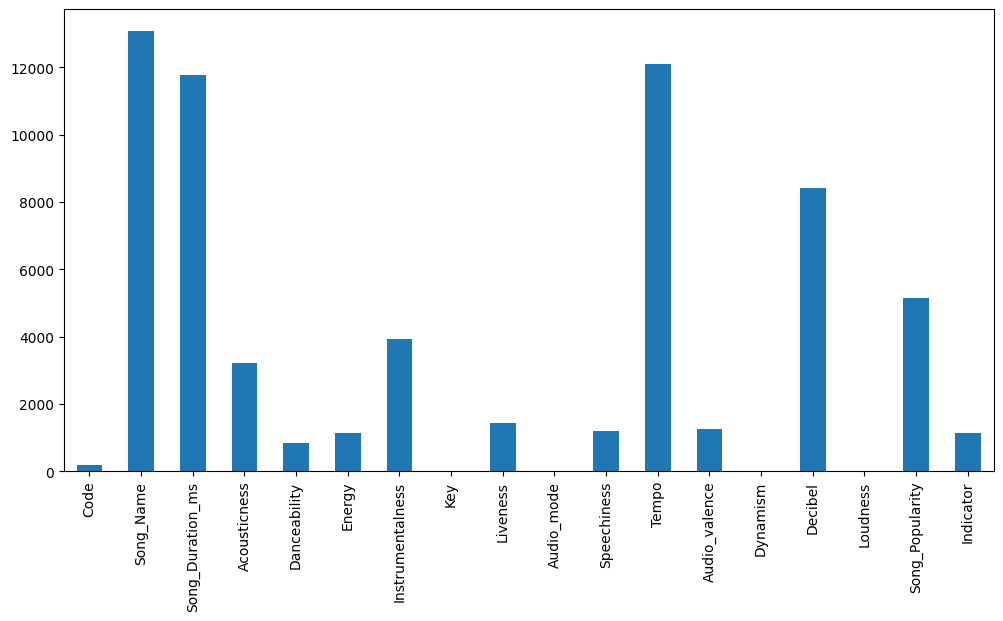

In [8]:
data.nunique().plot.bar(figsize=(12,6))

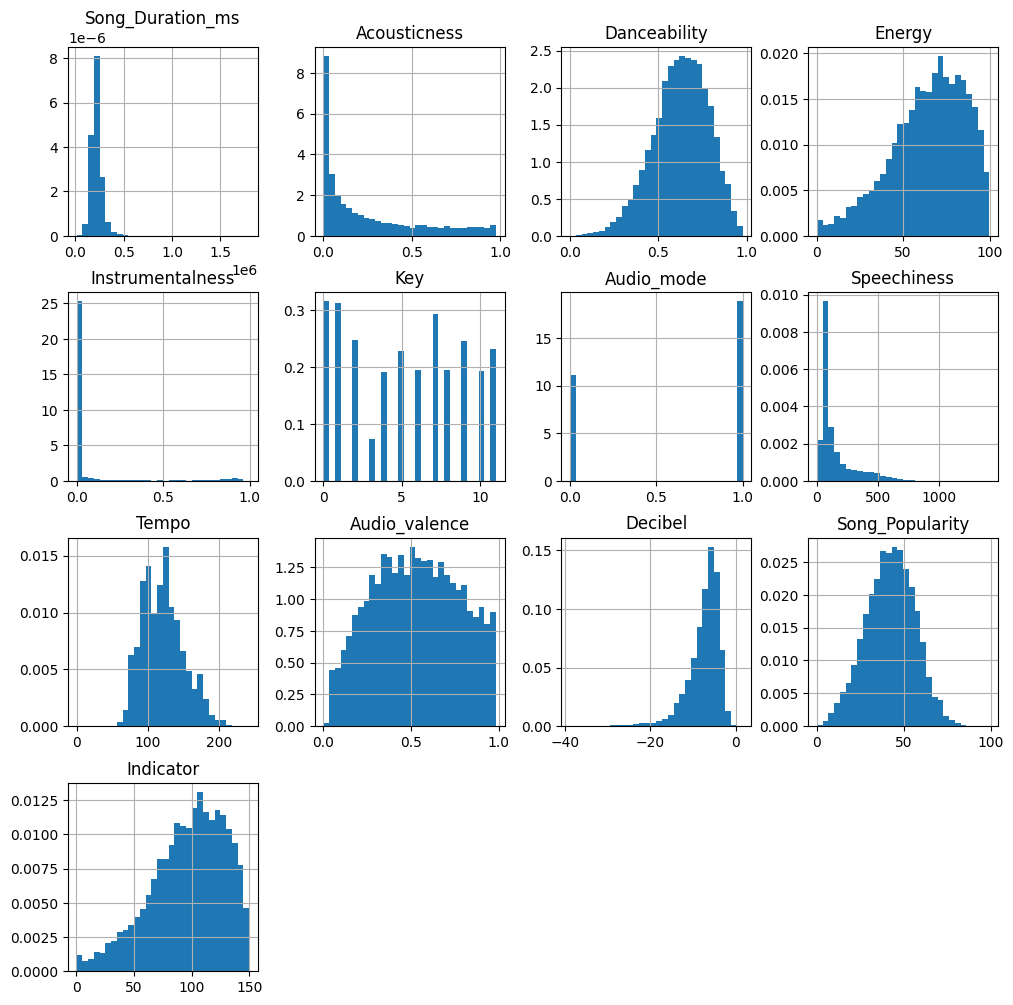

In [9]:
data.hist(bins=30, figsize=(12,12), density=True)
plt.show()

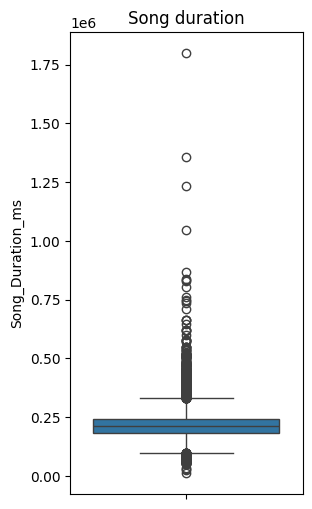

In [10]:
plt.figure(figsize=(3,6))
sns.boxplot(y=data['Song_Duration_ms'])
plt.title('Song duration')
plt.show()

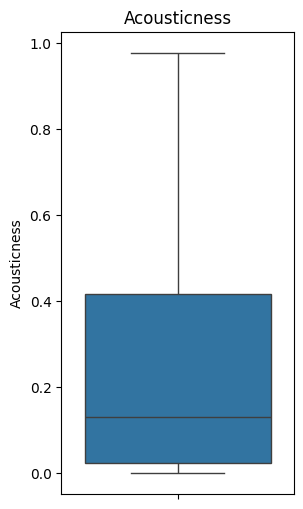

In [11]:
plt.figure(figsize=(3,6))
sns.boxplot(y=data['Acousticness'])
plt.title('Acousticness')
plt.show()

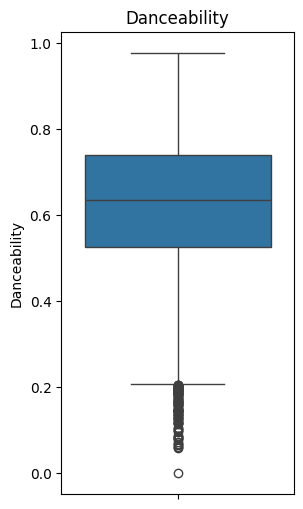

In [12]:
plt.figure(figsize=(3,6))
sns.boxplot(y=data['Danceability'])
plt.title('Danceability')
plt.show()

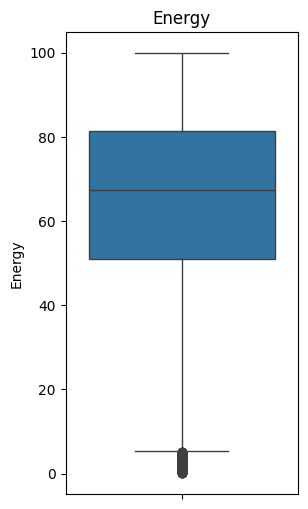

In [13]:
plt.figure(figsize=(3,6))
sns.boxplot(y=data['Energy'])
plt.title('Energy')
plt.show()

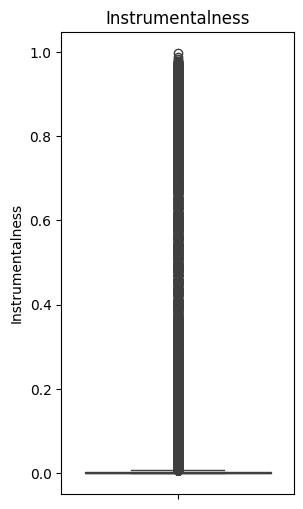

In [14]:
plt.figure(figsize=(3,6))
sns.boxplot(y=data['Instrumentalness'])
plt.title('Instrumentalness')
plt.show()

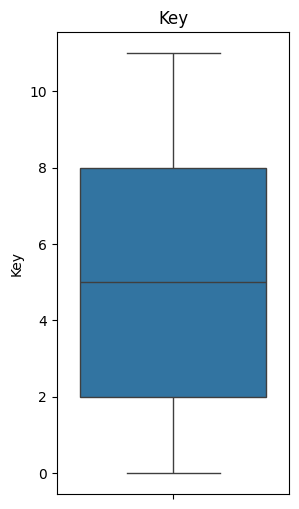

In [15]:
plt.figure(figsize=(3,6))
sns.boxplot(y=data['Key'])
plt.title('Key')
plt.show()

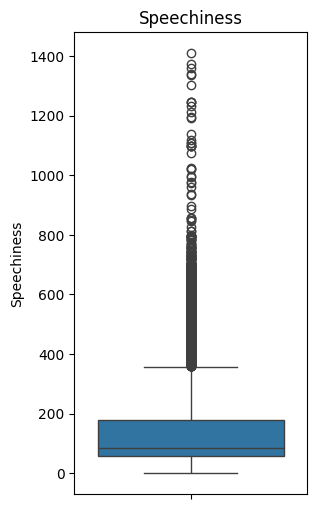

In [16]:
plt.figure(figsize=(3,6))
sns.boxplot(y=data['Speechiness'])
plt.title('Speechiness')
plt.show()

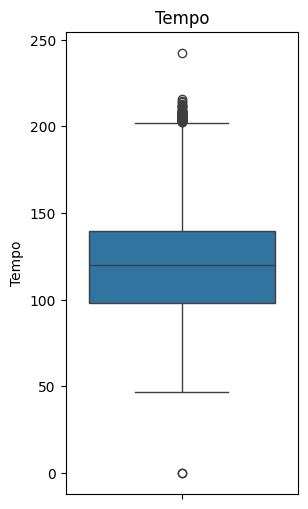

In [17]:
plt.figure(figsize=(3,6))
sns.boxplot(y=data['Tempo'])
plt.title('Tempo')
plt.show()

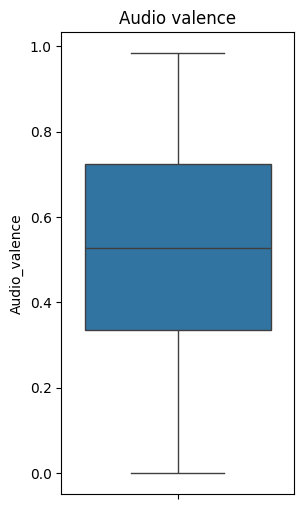

In [18]:
plt.figure(figsize=(3,6))
sns.boxplot(y=data['Audio_valence'])
plt.title('Audio valence')
plt.show()

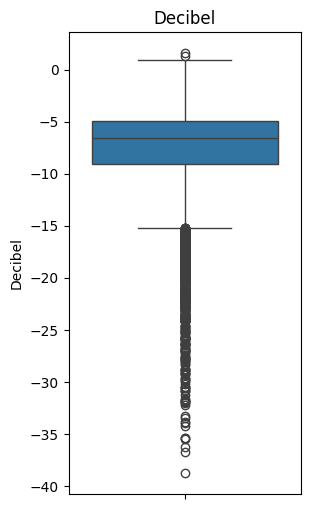

In [19]:
plt.figure(figsize=(3,6))
sns.boxplot(y=data['Decibel'])
plt.title('Decibel')
plt.show()

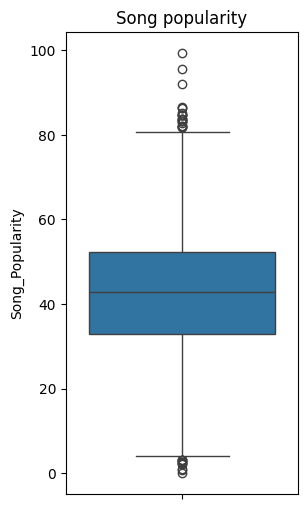

In [20]:
plt.figure(figsize=(3,6))
sns.boxplot(y=data['Song_Popularity'])
plt.title('Song popularity')
plt.show()

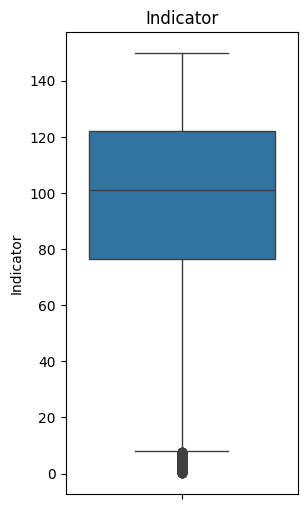

In [21]:
plt.figure(figsize=(3,6))
sns.boxplot(y=data['Indicator'])
plt.title('Indicator')
plt.show()

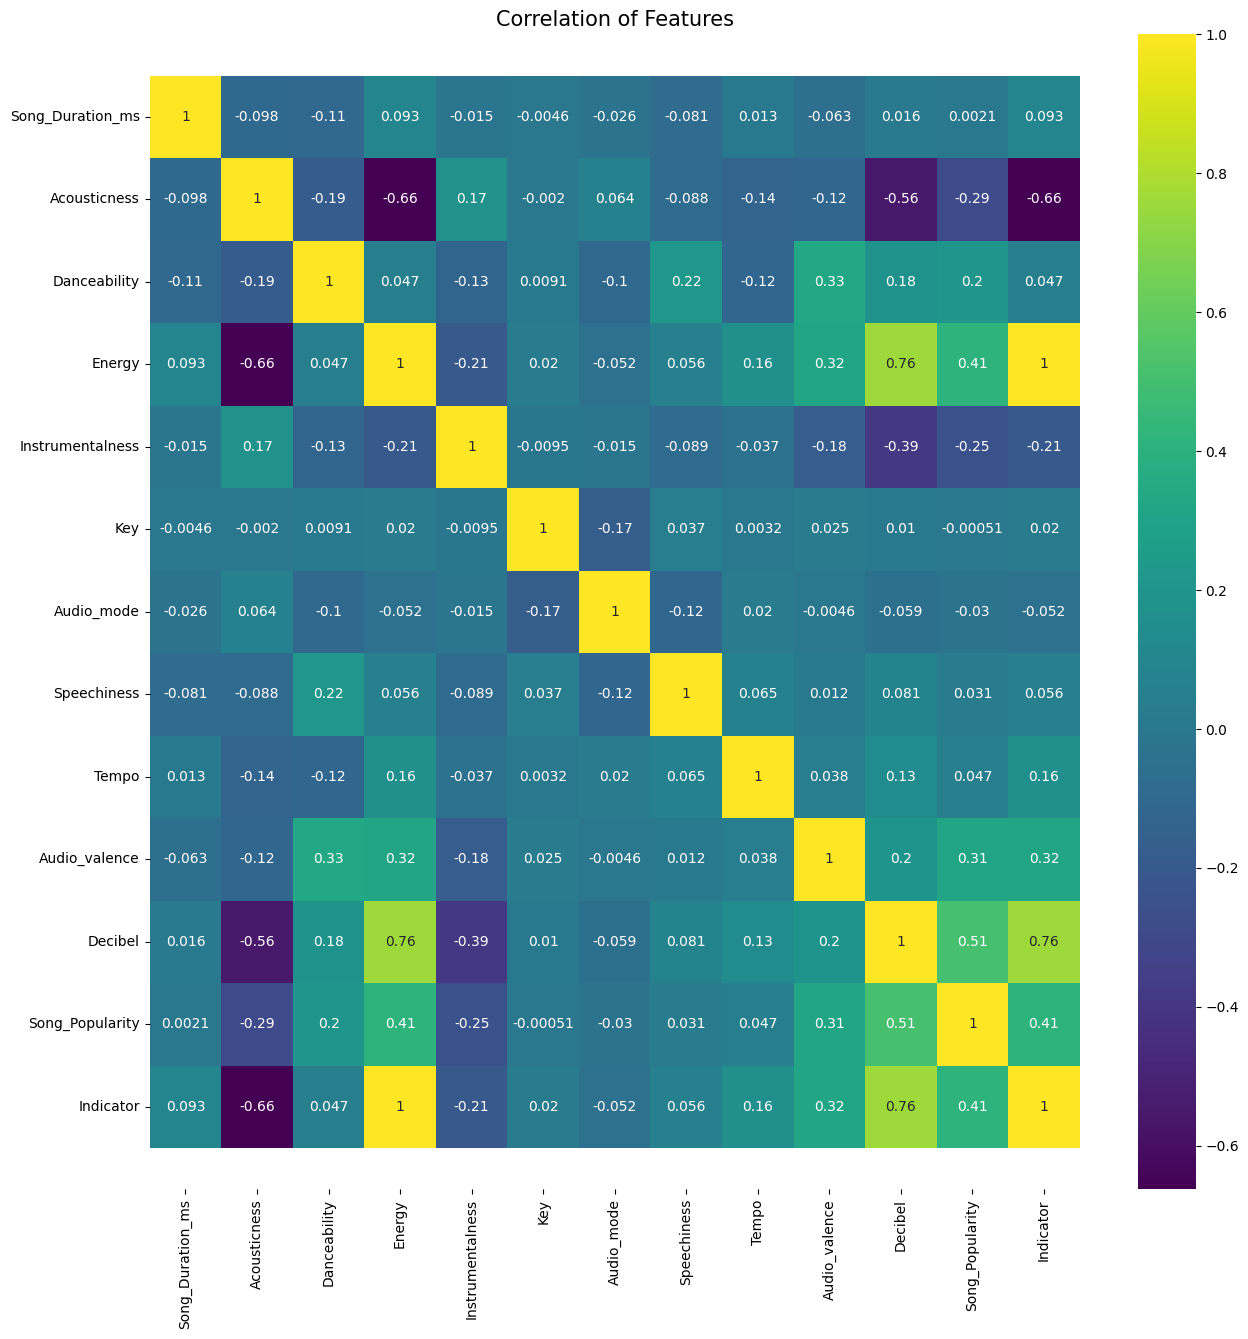

In [22]:
numcol = data.select_dtypes(include=['float64', 'int64'])


colormap = plt.cm.viridis
plt.figure(figsize=(15,15))
plt.title('Correlation of Features', size=15)
ax = sns.heatmap(numcol.astype(float).corr(), cmap=colormap, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

### Step 3: Data Preprocessing <a class="anchor" id = "s3"></a>

In [23]:
data = data.replace('?', np.nan)
data.head()

,Code,Song_Name,Song_Duration_ms,Acousticness,Danceability,Energy,Instrumentalness,Key,Liveness,Audio_mode,Speechiness,Tempo,Audio_valence,Dynamism,Decibel,Loudness,Song_Popularity,Indicator
0,HI8,Boulevard of Broken Dreams,262333,0.005410,0.49104,68.2,0.000029,8,112.126921,1,44.10,167.060,0.474,High,-4.095,Blare,57.72,102.30
1,HI10,In The End,216933,0.010094,0.53658,85.3,0.000000,3,122.7664,0,NaN,105.256,0.370,high,-6.407,Roar,45.37,127.95
2,MI11,Seven Nation Army,231733,0.008007,0.72963,46.3,0.447000,0,157.5025,1,118.80,123.881,0.324,Med,-7.828,Roar,47.28,69.45
3,EI8,By The Way,216933,0.025872,0.44649,97.0,0.003550,0,121.4404,1,160.50,122.444,0.198,Extra,-4.938,Blare,52.89,145.50
4,HI9,How You Remind Me,223826,0.000935,0.44253,76.6,0.000000,10,123.8769,1,46.95,172.011,0.574,Hi,-5.065,Blare,46.68,114.90


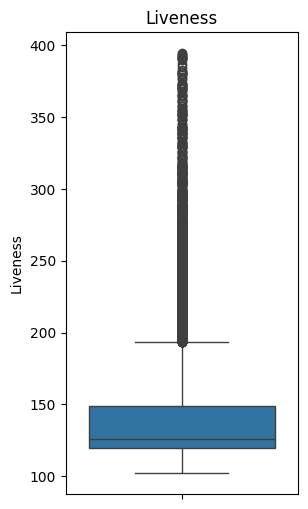

In [24]:
#Recast datatype of liveness column from object to float
data['Liveness'] = data['Liveness'].astype('float')

#Creating boxplot for it
plt.figure(figsize=(3,6))
sns.boxplot(y=data['Liveness'])
plt.title('Liveness')
plt.show()

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Code              18835 non-null  object 
 1   Song_Name         18835 non-null  object 
 2   Song_Duration_ms  18835 non-null  int64  
 3   Acousticness      18835 non-null  float64
 4   Danceability      15938 non-null  float64
 5   Energy            18835 non-null  float64
 6   Instrumentalness  18835 non-null  float64
 7   Key               18835 non-null  int64  
 8   Liveness          18834 non-null  float64
 9   Audio_mode        18835 non-null  int64  
 10  Speechiness       13184 non-null  float64
 11  Tempo             18835 non-null  float64
 12  Audio_valence     18835 non-null  float64
 13  Dynamism          15137 non-null  object 
 14  Decibel           18835 non-null  float64
 15  Loudness          16933 non-null  object 
 16  Song_Popularity   18835 non-null  float6

In [26]:
#Drop duplicates in the dataset
data = data.drop_duplicates(subset=['Code', 'Song_Name'])

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14215 entries, 0 to 18834
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Code              14215 non-null  object 
 1   Song_Name         14215 non-null  object 
 2   Song_Duration_ms  14215 non-null  int64  
 3   Acousticness      14215 non-null  float64
 4   Danceability      12050 non-null  float64
 5   Energy            14215 non-null  float64
 6   Instrumentalness  14215 non-null  float64
 7   Key               14215 non-null  int64  
 8   Liveness          14214 non-null  float64
 9   Audio_mode        14215 non-null  int64  
 10  Speechiness       9986 non-null   float64
 11  Tempo             14215 non-null  float64
 12  Audio_valence     14215 non-null  float64
 13  Dynamism          11442 non-null  object 
 14  Decibel           14215 non-null  float64
 15  Loudness          12761 non-null  object 
 16  Song_Popularity   14215 non-null  float64
 17

In [28]:
#Drop code column and name column
data = data.drop(columns = 'Code')
data = data.drop(columns = 'Song_Name')
data.head()

,Song_Duration_ms,Acousticness,Danceability,Energy,Instrumentalness,Key,Liveness,Audio_mode,Speechiness,Tempo,Audio_valence,Dynamism,Decibel,Loudness,Song_Popularity,Indicator
0,262333,0.005410,0.49104,68.2,0.000029,8,112.126921,1,44.10,167.060,0.474,High,-4.095,Blare,57.72,102.30
1,216933,0.010094,0.53658,85.3,0.000000,3,122.766400,0,NaN,105.256,0.370,high,-6.407,Roar,45.37,127.95
2,231733,0.008007,0.72963,46.3,0.447000,0,157.502500,1,118.80,123.881,0.324,Med,-7.828,Roar,47.28,69.45
3,216933,0.025872,0.44649,97.0,0.003550,0,121.440400,1,160.50,122.444,0.198,Extra,-4.938,Blare,52.89,145.50
4,223826,0.000935,0.44253,76.6,0.000000,10,123.876900,1,46.95,172.011,0.574,Hi,-5.065,Blare,46.68,114.90


In [29]:
#Cleaning the typoed category names
data = data.replace('Hi', 'High')
data = data.replace('h','High')
data = data.replace('high','High')
data = data.replace('l','Low')
data = data.replace('Lo','Low')
data = data.replace('m','Medium')
data = data.replace('Med','Medium')
data['Dynamism'].unique()

array(['High', 'Medium', 'Extra', nan, 'Low'], dtype=object)

In [30]:
#Finding max value for each category under dynamism
maxdyna = data.groupby('Dynamism')['Decibel'].max()
maxdyna

Dynamism
Extra     1.585
High     -0.257
Low      -6.873
Medium   -1.477
Name: Decibel, dtype: float64

In [31]:
#Dynamism column 11
#Get rid of null values
for i in range(len(data)):
    if(pd.isnull(data.iloc[i,11])):
        if(data.iloc[i,12]>-0.257):
            data.iloc[i,11] = 'Extra'
        elif(data.iloc[i,12]>-1.477):
            data.iloc[i,11] = 'High'
        elif(data.iloc[i,12]>-6.873):
            data.iloc[i,11] = 'Medium'
        else:
            data.iloc[i,11] = 'Low'

#Check if replaced properly
data.isnull().mean()

Song_Duration_ms    0.000000
Acousticness        0.000000
Danceability        0.152304
Energy              0.000000
Instrumentalness    0.000000
Key                 0.000000
Liveness            0.000070
Audio_mode          0.000000
Speechiness         0.297503
Tempo               0.000000
Audio_valence       0.000000
Dynamism            0.000000
Decibel             0.000000
Loudness            0.102286
Song_Popularity     0.000000
Indicator           0.000000
dtype: float64

In [32]:
#Finding max value for each category under loudness
maxloud = data.groupby('Loudness')['Decibel'].max()
maxloud = maxloud.sort_values(ascending = False)
maxloud

Loudness
Ear-splitting     1.585
Deafening         0.878
Blast            -0.257
Boom             -2.005
Blare            -4.001
Roar             -6.002
Clang            -8.003
Rumble          -10.001
Babble          -12.004
Chatter         -16.009
Buzz            -18.014
Drone           -20.046
Rustle          -22.008
Hum             -25.055
Mutter          -28.078
Mumble          -31.238
Whisper         -35.389
Murmur          -38.768
Name: Decibel, dtype: float64

In [33]:
#Loudness column 13
#Get rid of null values
for i in range(len(data)):
    if(pd.isnull(data.iloc[i,13])):
        if(data.iloc[i,12]>0.878):
            data.iloc[i,13] = 'Ear-splitting'
        elif(data.iloc[i,12]>-0.257):
            data.iloc[i,13] = 'Deafening'
        elif(data.iloc[i,12]>-2.005):
            data.iloc[i,13] = 'Blast'
        elif(data.iloc[i,12]>-4.001):
            data.iloc[i,13] = 'Boom'
        elif(data.iloc[i,12]>-6.002):
            data.iloc[i,13] = 'Blare'
        elif(data.iloc[i,12]>-8.003):
            data.iloc[i,13] = 'Roar'
        elif(data.iloc[i,12]>-10.001):
            data.iloc[i,13] = 'Clang'
        elif(data.iloc[i,12]>-12.004):
            data.iloc[i,13] = 'Rumble'
        elif(data.iloc[i,12]>-16.009):
            data.iloc[i,13] = 'Babble'
        elif(data.iloc[i,12]>-18.014):
            data.iloc[i,13] = 'Chatter'
        elif(data.iloc[i,12]>-20.046):
            data.iloc[i,13] = 'Buzz'
        elif(data.iloc[i,12]>-22.008):
            data.iloc[i,13] = 'Drone'
        elif(data.iloc[i,12]>-25.055):
            data.iloc[i,13] = 'Rustle'
        elif(data.iloc[i,12]>-28.078):
            data.iloc[i,13] = 'Hum'
        elif(data.iloc[i,12]>-31.238):
            data.iloc[i,13] = 'Mutter'
        elif(data.iloc[i,12]>-35.389):
            data.iloc[i,13] = 'Mumble'
        elif(data.iloc[i,12]>-38.768):
            data.iloc[i,13] = 'Whisper'
        else:
            data.iloc[i,13] = 'Murmur'
            
#Check if replaced properly
data.isnull().mean()

Song_Duration_ms    0.000000
Acousticness        0.000000
Danceability        0.152304
Energy              0.000000
Instrumentalness    0.000000
Key                 0.000000
Liveness            0.000070
Audio_mode          0.000000
Speechiness         0.297503
Tempo               0.000000
Audio_valence       0.000000
Dynamism            0.000000
Decibel             0.000000
Loudness            0.000000
Song_Popularity     0.000000
Indicator           0.000000
dtype: float64

In [34]:
#check distributions
def diagnostic_plots(df, variable):
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title(variable)

    plt.show()

### Step 4: Train and Test Split <a class="anchor" id = "s4"></a>

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('Song_Popularity', axis=1), data['Song_Popularity'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((9950, 15), (4265, 15))

### Step 5: Missing Value Imputation <a class="anchor" id = "s5"></a>

In [36]:
X_train[['Liveness', 'Danceability', 'Speechiness']].isnull().mean()

Liveness        0.000101
Danceability    0.152864
Speechiness     0.299497
dtype: float64

In [37]:
median_imputer = MeanMedianImputer(imputation_method='median',
                                   variables=['Liveness', 'Danceability', 'Speechiness'])

median_imputer.fit(X_train)

MeanMedianImputer(variables=['Liveness', 'Danceability', 'Speechiness'])

In [38]:
median_imputer.imputer_dict_

{'Liveness': 125.6641, 'Danceability': 0.62865, 'Speechiness': 81.3}

In [39]:
X_train = median_imputer.transform(X_train)
X_test = median_imputer.transform(X_test)

In [40]:
X_train.isnull().sum()

Song_Duration_ms    0
Acousticness        0
Danceability        0
Energy              0
Instrumentalness    0
Key                 0
Liveness            0
Audio_mode          0
Speechiness         0
Tempo               0
Audio_valence       0
Dynamism            0
Decibel             0
Loudness            0
Indicator           0
dtype: int64

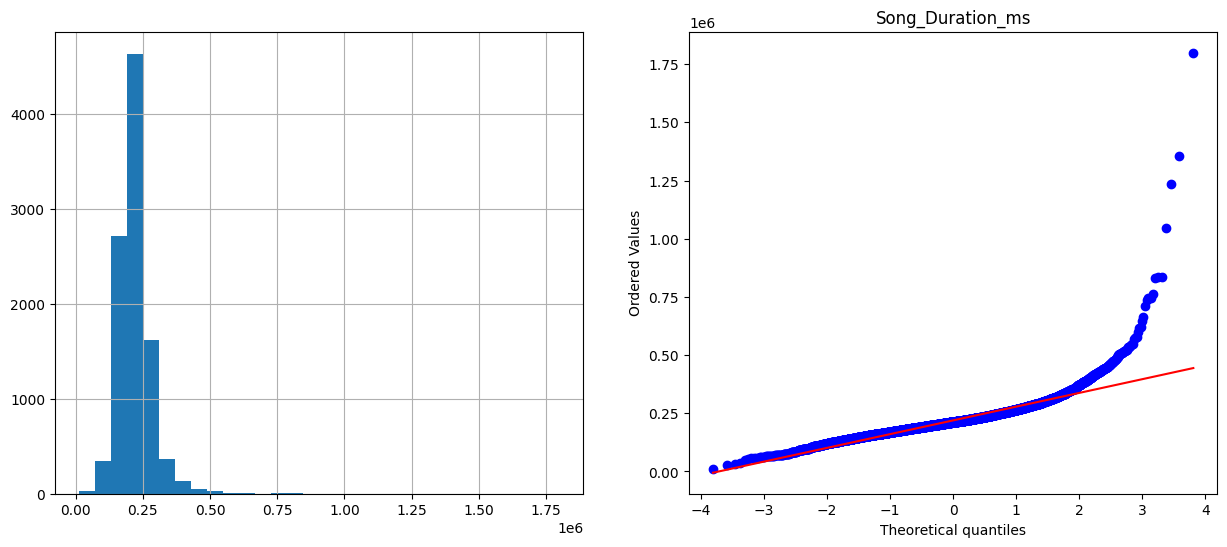

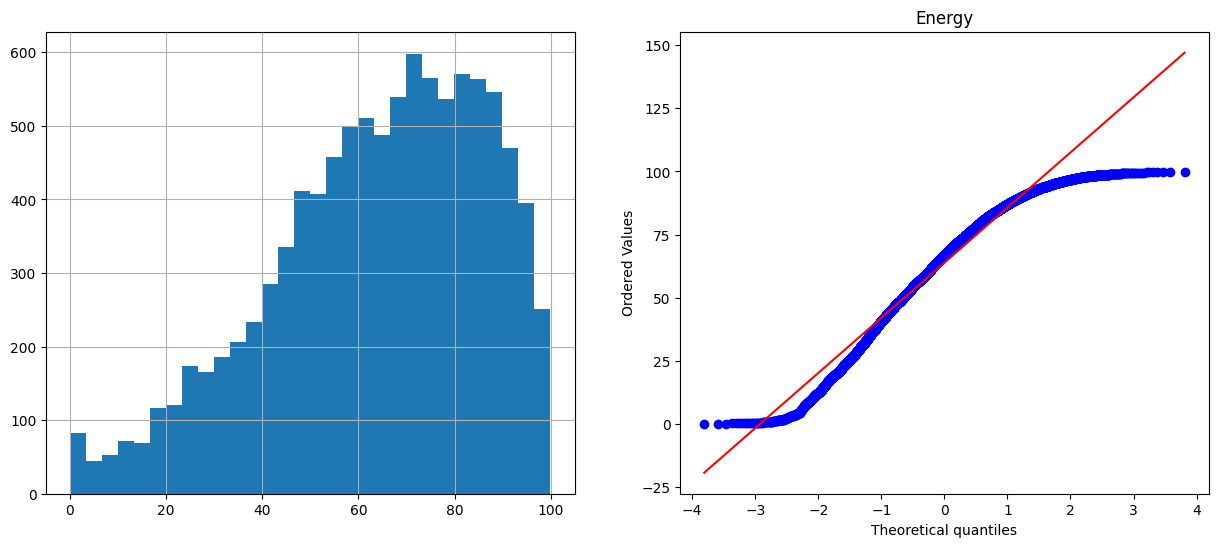

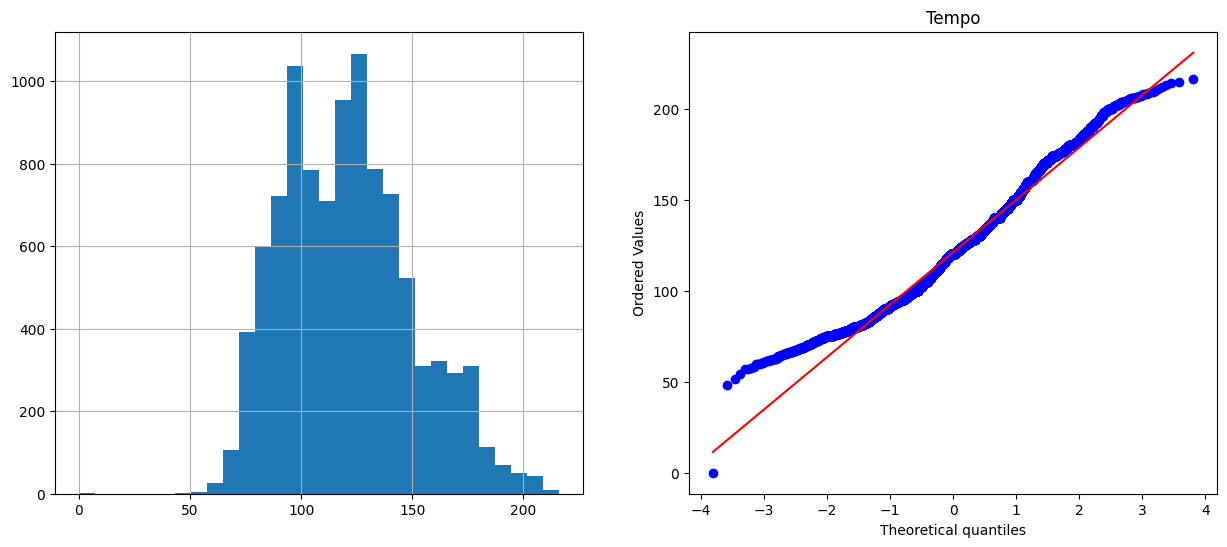

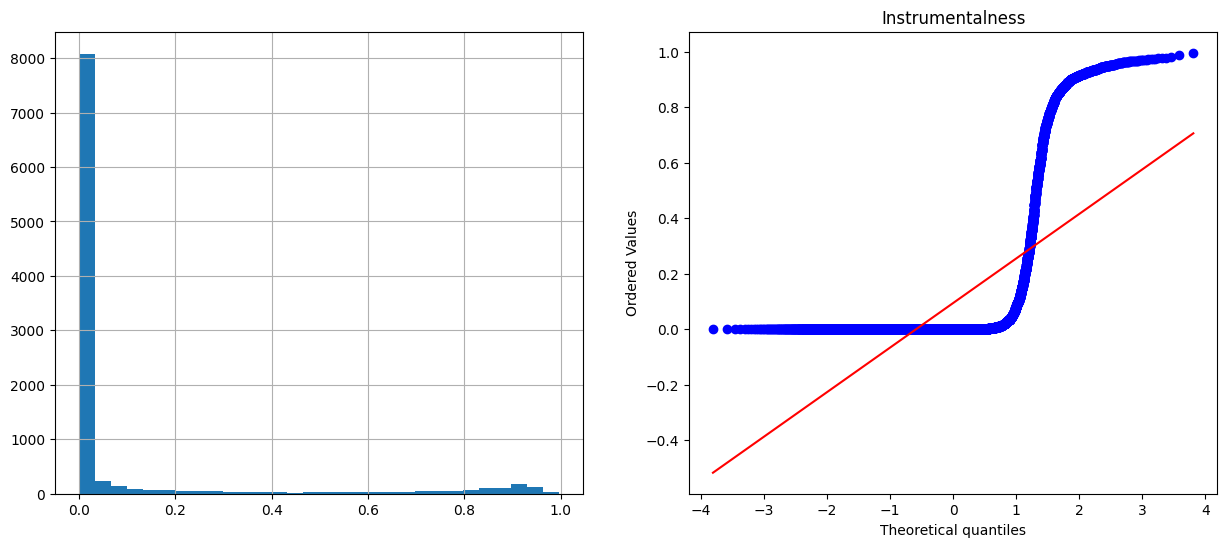

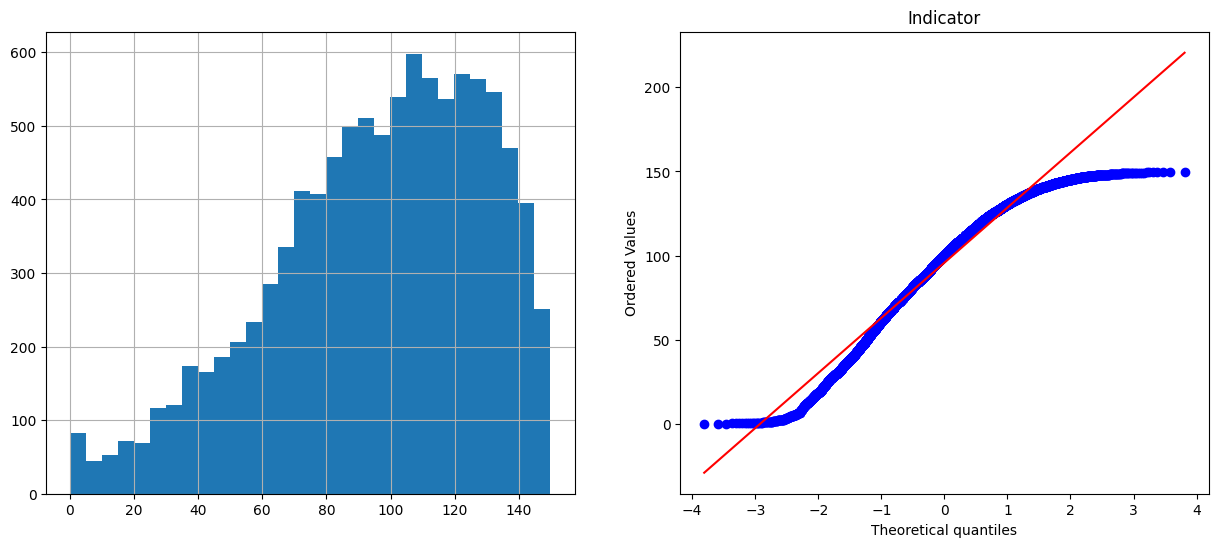

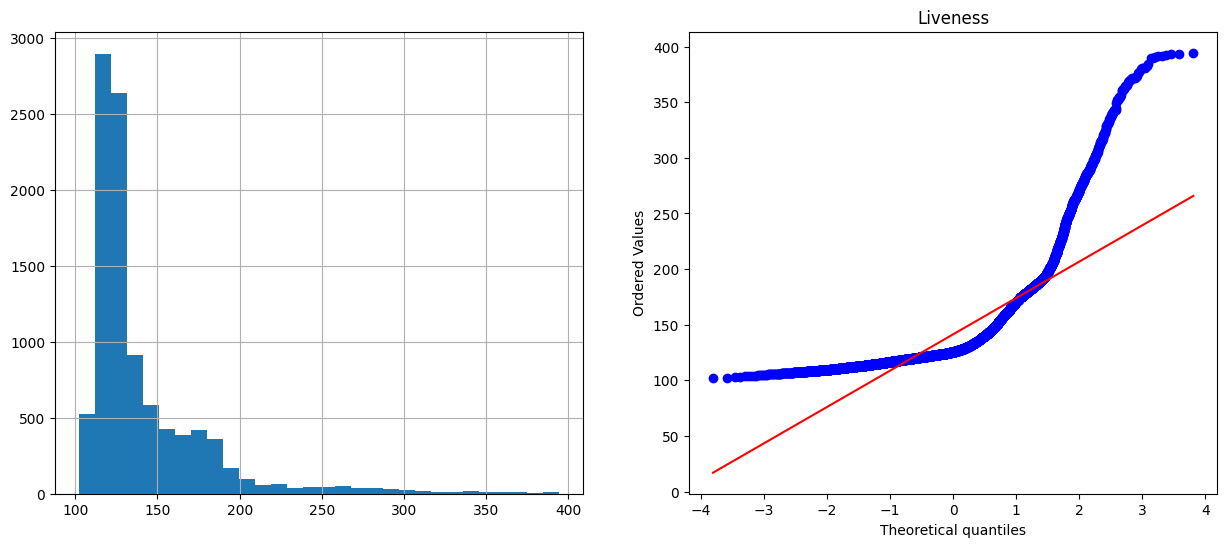

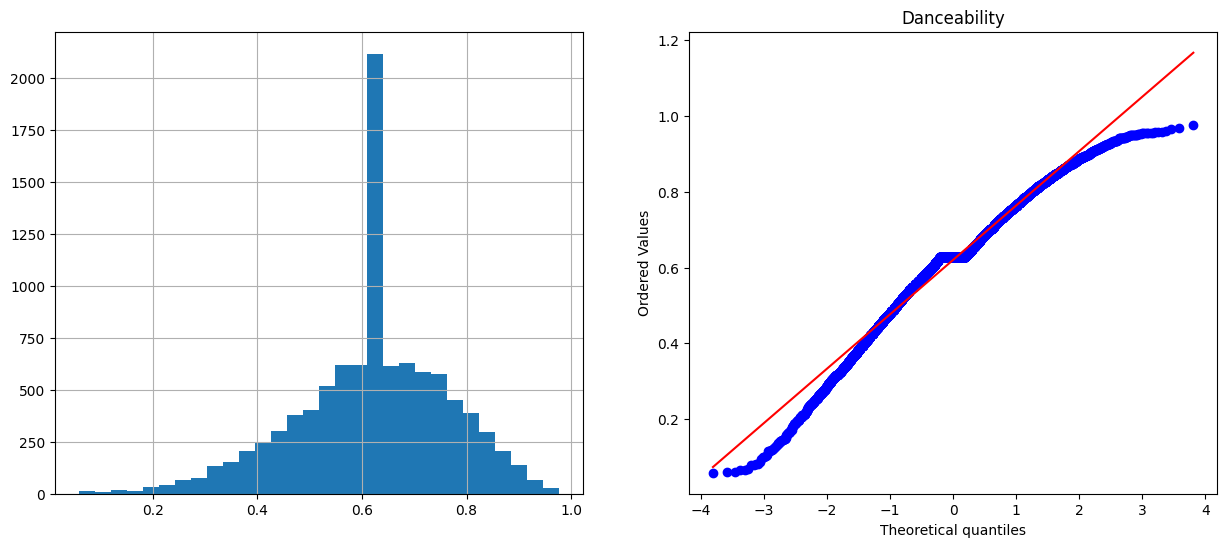

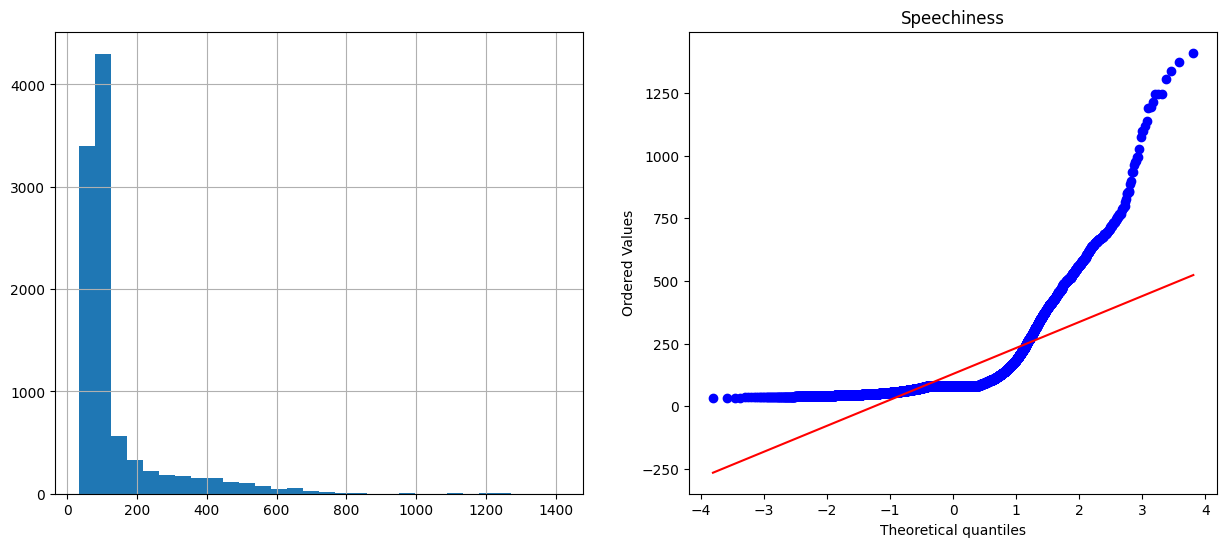

In [41]:
diagnostic_plots(X_train, 'Song_Duration_ms')
diagnostic_plots(X_train, 'Energy')
diagnostic_plots(X_train, 'Tempo')
diagnostic_plots(X_train, 'Instrumentalness')
diagnostic_plots(X_train, 'Indicator')
diagnostic_plots(X_train, 'Liveness')
diagnostic_plots(X_train, 'Danceability')
diagnostic_plots(X_train, 'Speechiness')

In [42]:
yjt = YeoJohnsonTransformer(variables = ['Song_Duration_ms', 'Energy', 'Tempo','Instrumentalness','Indicator',
                                         'Liveness','Danceability','Speechiness'])
yjt.fit(X_train)

YeoJohnsonTransformer(variables=['Song_Duration_ms', 'Energy', 'Tempo',
                                 'Instrumentalness', 'Indicator', 'Liveness',
                                 'Danceability', 'Speechiness'])

In [43]:
X_train = yjt.transform(X_train)
X_test = yjt.transform(X_test)

In [44]:
#Using capping since there are multiple values that are outliers and so trimming may result in loss of accuracy

windsorizer = Winsorizer(capping_method='gaussian',
                          tail='both',
                          fold=3,
                          variables = ['Liveness','Danceability','Speechiness','Song_Duration_ms','Acousticness','Energy','Instrumentalness',
                                       'Tempo','Audio_valence','Indicator'])

windsorizer.fit(X_train)

Winsorizer(tail='both',
           variables=['Liveness', 'Danceability', 'Speechiness',
                      'Song_Duration_ms', 'Acousticness', 'Energy',
                      'Instrumentalness', 'Tempo', 'Audio_valence',
                      'Indicator'])

In [45]:
X_train = windsorizer.transform(X_train)
X_test = windsorizer.transform(X_test)

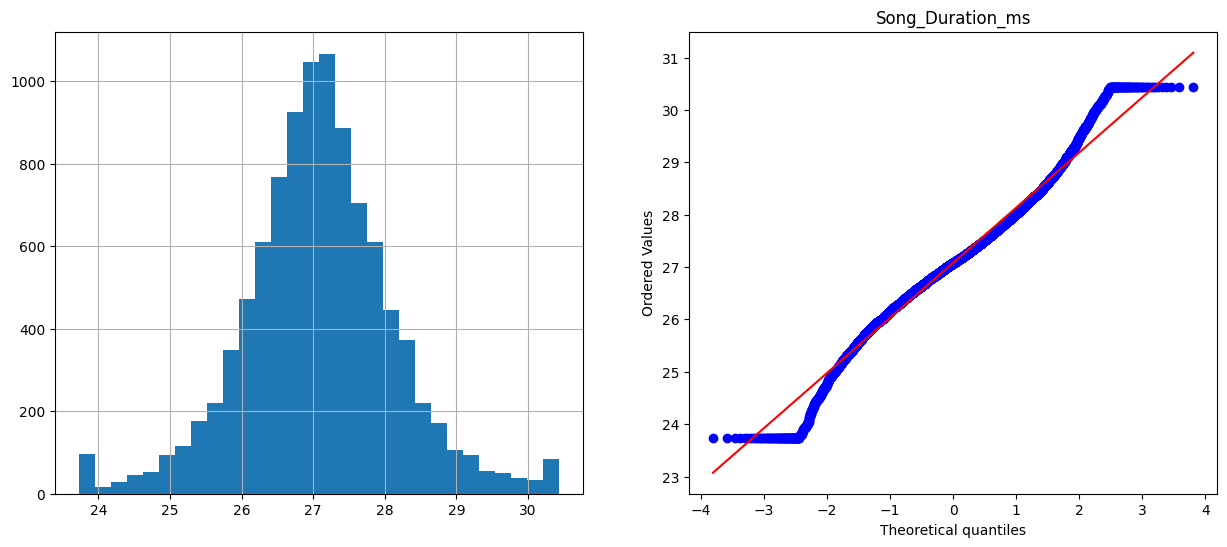

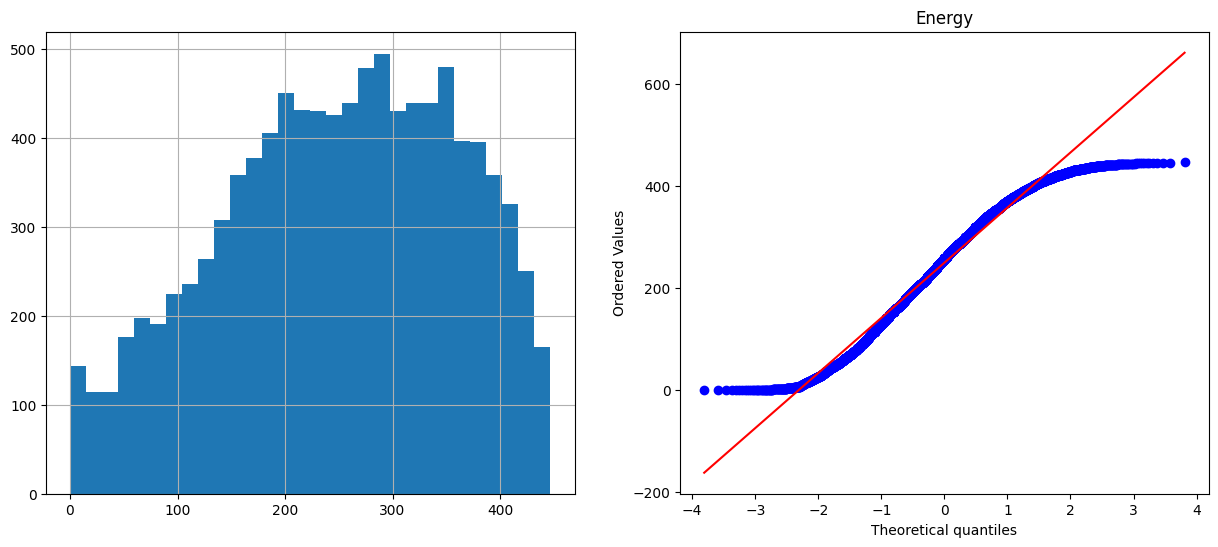

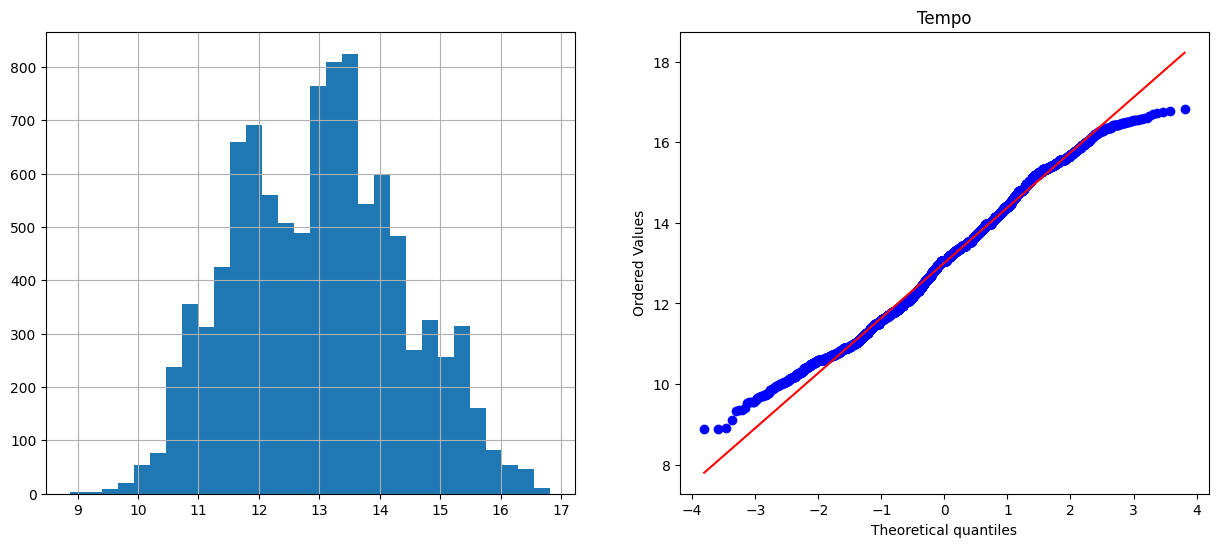

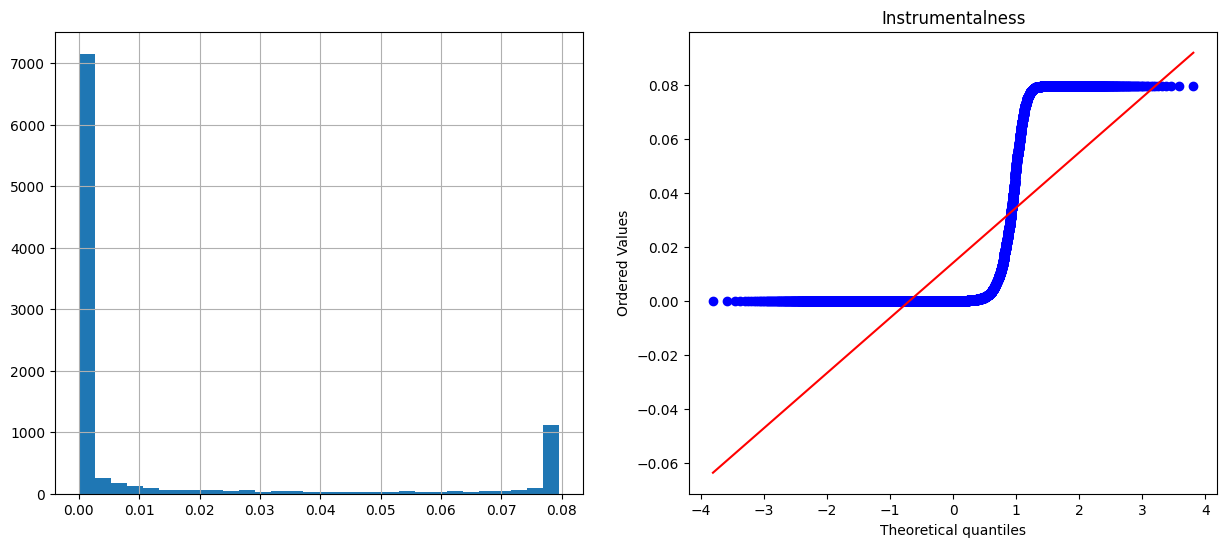

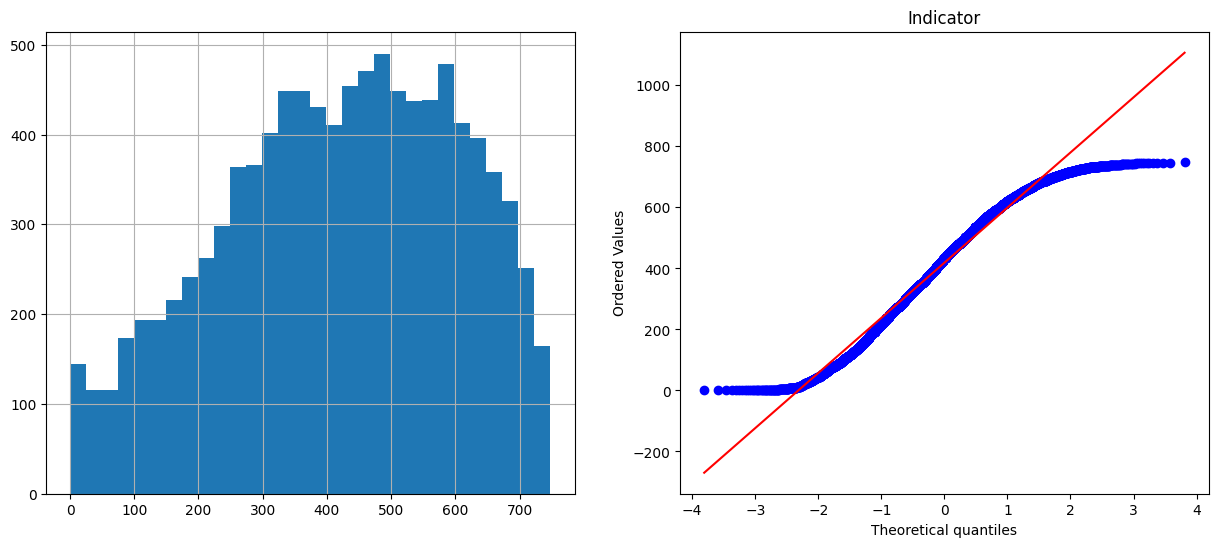

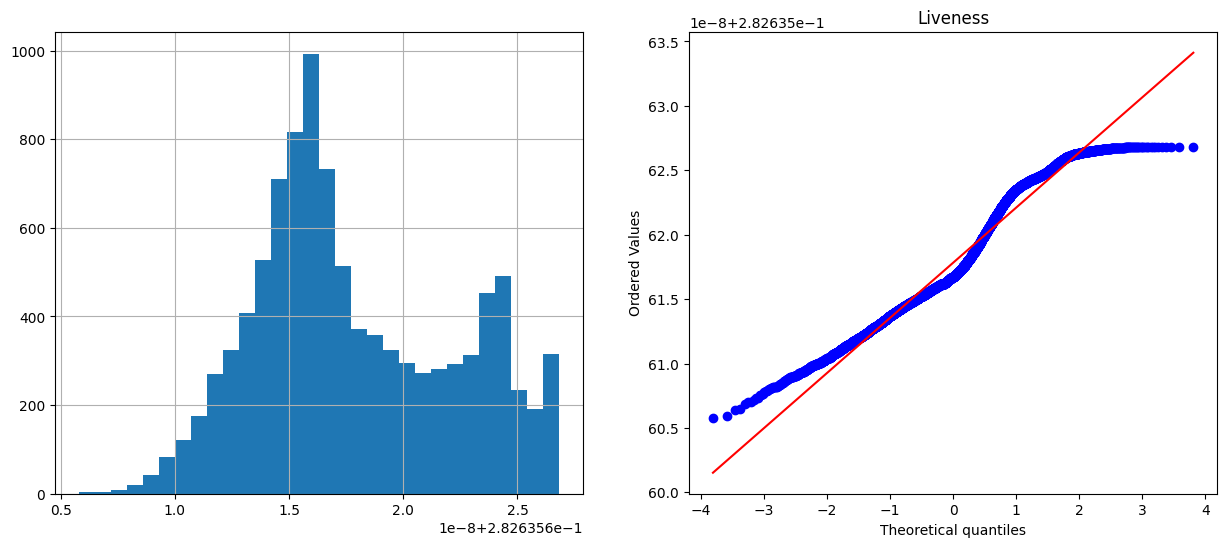

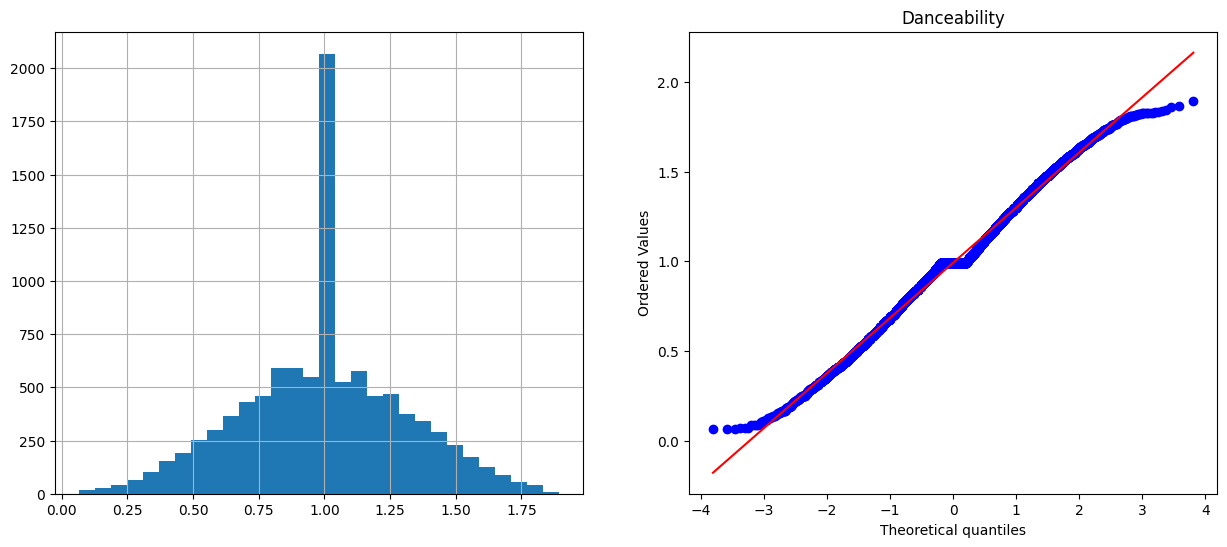

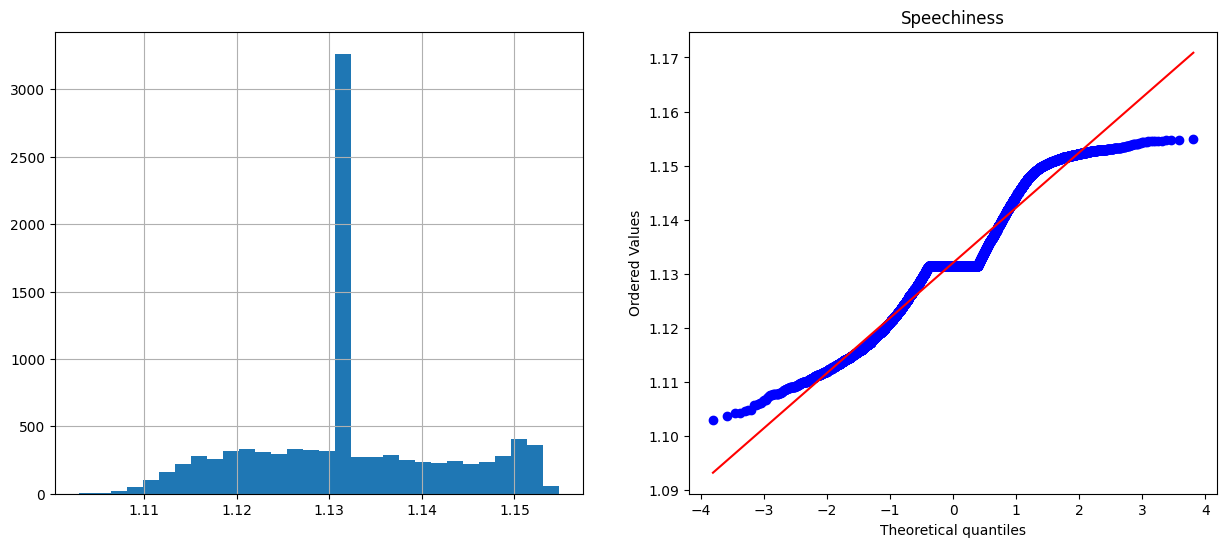

In [46]:
diagnostic_plots(X_train, 'Song_Duration_ms')
diagnostic_plots(X_train, 'Energy')
diagnostic_plots(X_train, 'Tempo')
diagnostic_plots(X_train, 'Instrumentalness')
diagnostic_plots(X_train, 'Indicator')
diagnostic_plots(X_train, 'Liveness')
diagnostic_plots(X_train, 'Danceability')
diagnostic_plots(X_train, 'Speechiness')

### Step 6: Categorical Data Encoding <a class="anchor" id = "s6"></a>

In [47]:
#Categorical variables
cat_cols = [c for c in X_train.columns if X_train[c].dtypes=='O']
X_train[cat_cols].isnull().mean()

Dynamism    0.0
Loudness    0.0
dtype: float64

In [48]:
#Use ordinal encoding for Dynamism since it has an order
dandlcol = ['Dynamism']
ordinal_enc = OrdinalEncoder(
    encoding_method='arbitrary',
    variables=dandlcol)

In [49]:
ordinal_enc.fit(X_train)

OrdinalEncoder(encoding_method='arbitrary', variables=['Dynamism'])

In [51]:
ordinal_enc.encoder_dict_

{'Dynamism': {'High': 0, 'Medium': 1, 'Low': 2, 'Extra': 3}}

In [52]:
X_train = ordinal_enc.transform(X_train)
X_test = ordinal_enc.transform(X_test)

In [53]:
#Use rare encoding for Loudness since it has high cardinality
rare_encoder = RareLabelEncoder(tol=0.05, n_categories=4,variables=['Loudness'])  

In [54]:
rare_encoder.fit(X_train)

RareLabelEncoder(n_categories=4, variables=['Loudness'])

In [55]:
X_train = rare_encoder.transform(X_train)
X_test = rare_encoder.transform(X_test)

In [56]:
ohe_enc = OneHotEncoder(
    variables=['Loudness'],
    drop_last=False)

ohe_enc.fit(X_train)

OneHotEncoder(variables=['Loudness'])

In [58]:
ohe_enc.encoder_dict_

{'Loudness': ['Blare', 'Rumble', 'Clang', 'Babble', 'Rare', 'Roar', 'Boom']}

In [59]:
X_train = ohe_enc.transform(X_train)
X_test = ohe_enc.transform(X_test)

In [60]:
X_train.head()

,Song_Duration_ms,Acousticness,Danceability,Energy,Instrumentalness,Key,Liveness,Audio_mode,Speechiness,Tempo,...,Dynamism,Decibel,Indicator,Loudness_Blare,Loudness_Rumble,Loudness_Clang,Loudness_Babble,Loudness_Rare,Loudness_Roar,Loudness_Boom
12337,27.074995,0.207760,1.287426,223.154195,0.000105,6,0.282636,1,1.144947,10.035274,...,0,-4.359,374.685458,1,0,0,0,0,0,0
15260,28.389764,0.265580,0.836458,56.525802,0.000007,4,0.282636,0,1.114256,10.905438,...,1,-11.713,95.075257,0,1,0,0,0,0,0
11581,26.977938,0.056546,1.518418,263.800252,0.000000,5,0.282636,0,1.148618,13.479067,...,0,-8.944,442.648094,0,0,1,0,0,0,0
5308,25.999858,0.295960,0.581316,93.432209,0.000012,9,0.282636,1,1.131451,12.353547,...,1,-15.107,157.187498,0,0,0,1,0,0,0
4834,27.259632,0.922180,0.229686,26.061273,0.079589,7,0.282636,1,1.122647,10.808248,...,2,-22.350,43.696663,0,0,0,0,1,0,0


### Step 7: Variable Discretization /Binning <a class="anchor" id = "s7"></a>

In [61]:
#Numerical variables
num_cols = [c for c in X_train.columns if X_train[c].dtypes!='O']
X_train[num_cols].isnull().mean().sort_values()

Song_Duration_ms    0.0
Loudness_Rare       0.0
Loudness_Babble     0.0
Loudness_Clang      0.0
Loudness_Rumble     0.0
Loudness_Blare      0.0
Indicator           0.0
Decibel             0.0
Dynamism            0.0
Loudness_Roar       0.0
Audio_valence       0.0
Speechiness         0.0
Audio_mode          0.0
Liveness            0.0
Key                 0.0
Instrumentalness    0.0
Energy              0.0
Danceability        0.0
Acousticness        0.0
Tempo               0.0
Loudness_Boom       0.0
dtype: float64

In [62]:
disc = EqualWidthDiscretiser(bins=30, variables=['Song_Duration_ms','Acousticness','Instrumentalness','Key','Audio_mode','Tempo','Audio_valence',
                                                 'Decibel','Indicator'])

disc.fit(X_train)

EqualWidthDiscretiser(bins=30,
                      variables=['Song_Duration_ms', 'Acousticness',
                                 'Instrumentalness', 'Key', 'Audio_mode',
                                 'Tempo', 'Audio_valence', 'Decibel',
                                 'Indicator'])

In [63]:
disc.binner_dict_

{'Song_Duration_ms': [-inf,
  23.950231804058703,
  24.17388458109985,
  24.397537358140998,
  24.621190135182147,
  24.844842912223292,
  25.06849568926444,
  25.29214846630559,
  25.515801243346736,
  25.739454020387885,
  25.963106797429035,
  26.18675957447018,
  26.41041235151133,
  26.63406512855248,
  26.857717905593624,
  27.081370682634773,
  27.305023459675922,
  27.528676236717068,
  27.752329013758217,
  27.975981790799366,
  28.199634567840512,
  28.42328734488166,
  28.64694012192281,
  28.870592898963956,
  29.094245676005105,
  29.317898453046254,
  29.5415512300874,
  29.76520400712855,
  29.9888567841697,
  30.212509561210844,
  inf],
 'Acousticness': [-inf,
  0.032537285666666665,
  0.06507324133333332,
  0.09760919699999998,
  0.13014515266666665,
  0.16268110833333332,
  0.19521706399999997,
  0.22775301966666664,
  0.26028897533333334,
  0.292824931,
  0.3253608866666667,
  0.35789684233333335,
  0.39043279799999997,
  0.42296875366666664,
  0.4555047093333333,
  

In [64]:
X_train = disc.transform(X_train)
X_test = disc.transform(X_test)

Text(0, 0.5, 'Number of observations per bin')

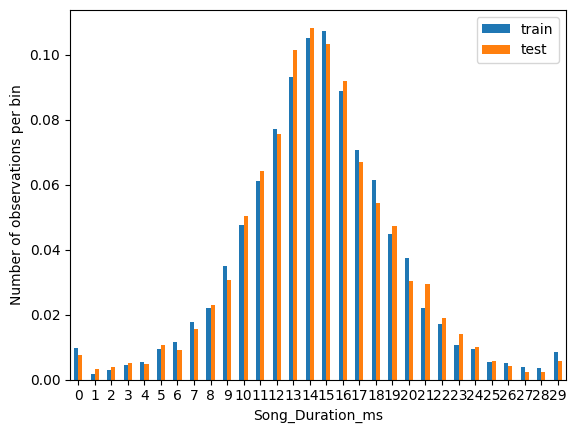

In [65]:
t1 = X_train.groupby(['Song_Duration_ms'])['Song_Duration_ms'].count() / len(X_train)
t2 = X_test.groupby(['Song_Duration_ms'])['Song_Duration_ms'].count() / len(X_test)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']

tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

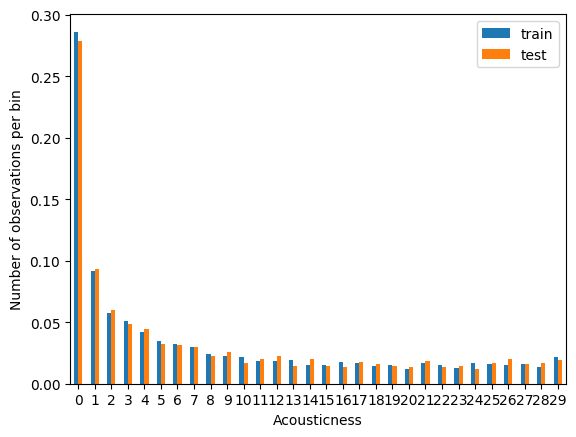

In [66]:
t1 = X_train.groupby(['Acousticness'])['Acousticness'].count() / len(X_train)
t2 = X_test.groupby(['Acousticness'])['Acousticness'].count() / len(X_test)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']

tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

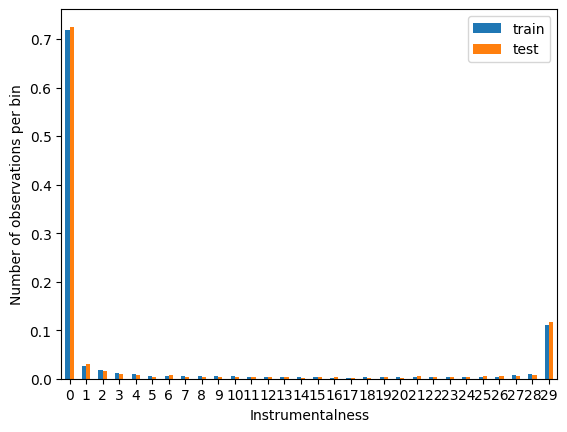

In [67]:
t1 = X_train.groupby(['Instrumentalness'])['Instrumentalness'].count() / len(X_train)
t2 = X_test.groupby(['Instrumentalness'])['Instrumentalness'].count() / len(X_test)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']

tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

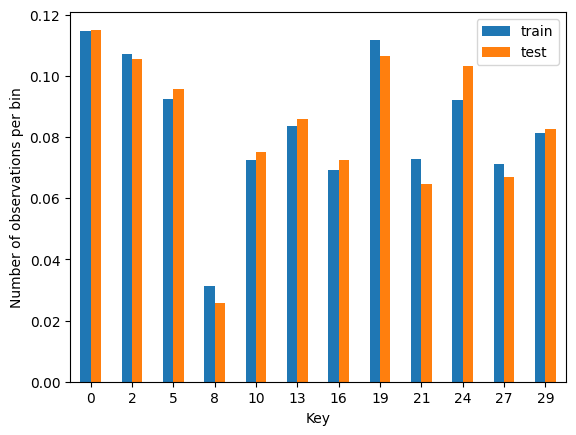

In [68]:
t1 = X_train.groupby(['Key'])['Key'].count() / len(X_train)
t2 = X_test.groupby(['Key'])['Key'].count() / len(X_test)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']

tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

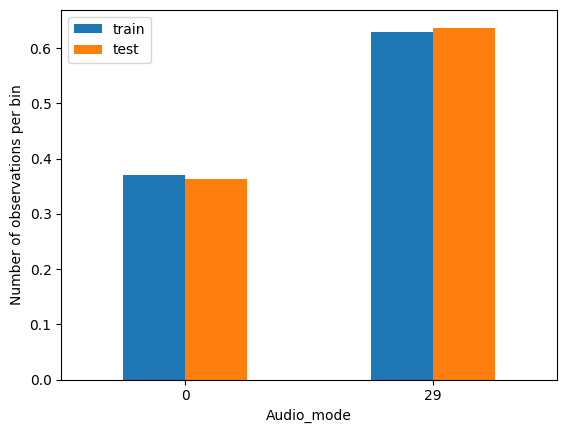

In [69]:
t1 = X_train.groupby(['Audio_mode'])['Audio_mode'].count() / len(X_train)
t2 = X_test.groupby(['Audio_mode'])['Audio_mode'].count() / len(X_test)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']

tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

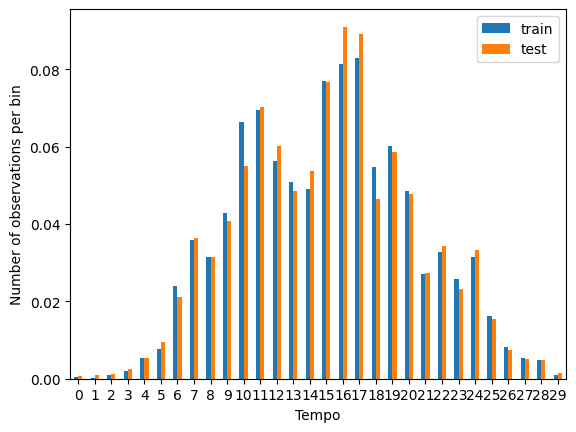

In [70]:
t1 = X_train.groupby(['Tempo'])['Tempo'].count() / len(X_train)
t2 = X_test.groupby(['Tempo'])['Tempo'].count() / len(X_test)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']

tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

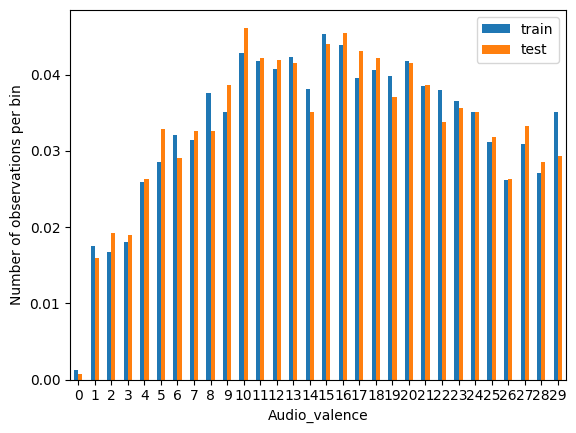

In [71]:
t1 = X_train.groupby(['Audio_valence'])['Audio_valence'].count() / len(X_train)
t2 = X_test.groupby(['Audio_valence'])['Audio_valence'].count() / len(X_test)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']

tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

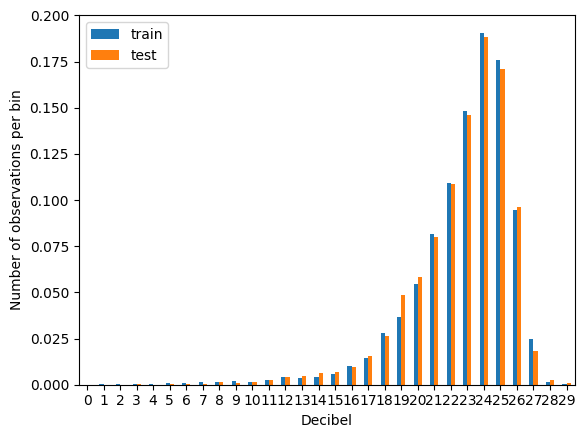

In [72]:
t1 = X_train.groupby(['Decibel'])['Decibel'].count() / len(X_train)
t2 = X_test.groupby(['Decibel'])['Decibel'].count() / len(X_test)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']

tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

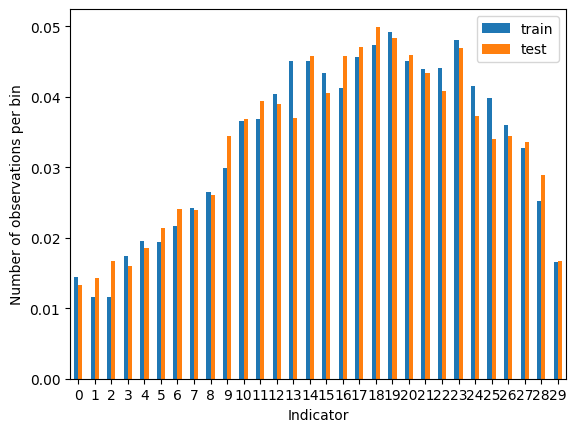

In [73]:
t1 = X_train.groupby(['Indicator'])['Indicator'].count() / len(X_train)
t2 = X_test.groupby(['Indicator'])['Indicator'].count() / len(X_test)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']

tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

### Step 8: Feature Engineer <a class="anchor" id = "s8"></a>

In [74]:
scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [75]:
scaler.scale_

array([3.44827586e-02, 3.44827586e-02, 5.46771725e-01, 2.23799793e-03,
       3.44827586e-02, 3.44827586e-02, 4.75405196e+07, 3.44827586e-02,
       1.92678434e+01, 3.44827586e-02, 3.44827586e-02, 3.33333333e-01,
       3.44827586e-02, 3.44827586e-02, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00])

In [76]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [77]:
X_train.columns

Index(['Song_Duration_ms', 'Acousticness', 'Danceability', 'Energy',
       'Instrumentalness', 'Key', 'Liveness', 'Audio_mode', 'Speechiness',
       'Tempo', 'Audio_valence', 'Dynamism', 'Decibel', 'Indicator',
       'Loudness_Blare', 'Loudness_Rumble', 'Loudness_Clang',
       'Loudness_Babble', 'Loudness_Rare', 'Loudness_Roar', 'Loudness_Boom'],
      dtype='object')

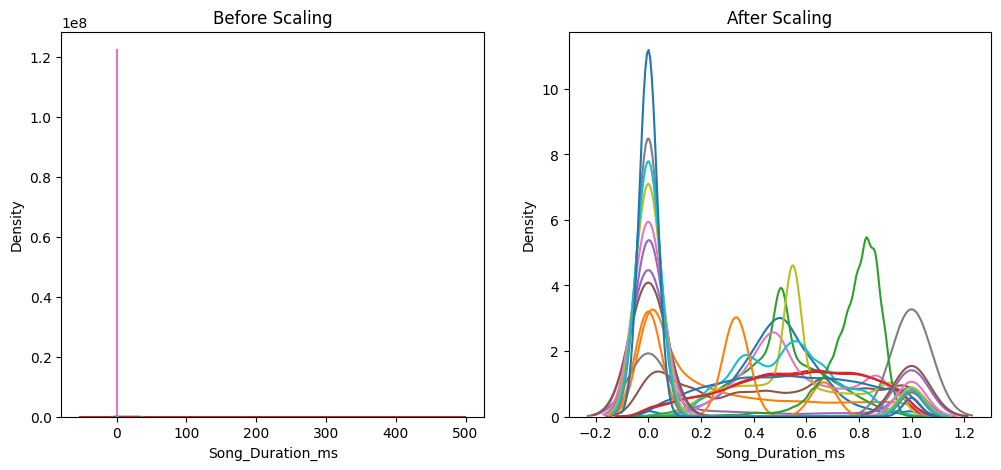

In [78]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Song_Duration_ms'], ax=ax1, label ='Song_Duration_ms')
sns.kdeplot(X_train['Acousticness'], ax=ax1, label ='Acousticness')
sns.kdeplot(X_train['Danceability'], ax=ax1, label ='Danceability')
sns.kdeplot(X_train['Energy'], ax=ax1, label ='Energy')
sns.kdeplot(X_train['Instrumentalness'], ax=ax1, label ='Instrumentalness')
sns.kdeplot(X_train['Key'], ax=ax1, label ='Key')
sns.kdeplot(X_train['Liveness'], ax=ax1, label ='Liveness')
sns.kdeplot(X_train['Audio_mode'], ax=ax1, label ='Audio_mode')
sns.kdeplot(X_train['Speechiness'], ax=ax1, label ='Speechiness')
sns.kdeplot(X_train['Tempo'], ax=ax1, label ='Tempo')
sns.kdeplot(X_train['Audio_valence'], ax=ax1, label ='Audio_valence')
sns.kdeplot(X_train['Dynamism'], ax=ax1, label ='Dynamism')
sns.kdeplot(X_train['Decibel'], ax=ax1, label ='Decibel')
sns.kdeplot(X_train['Indicator'], ax=ax1, label ='Indicator')
sns.kdeplot(X_train['Loudness_Roar'], ax=ax1, label ='Loudness_Roar')
sns.kdeplot(X_train['Loudness_Blare'], ax=ax1, label ='Loudness_Blare')
sns.kdeplot(X_train['Loudness_Clang'], ax=ax1, label ='Loudness_Clang')
sns.kdeplot(X_train['Loudness_Babble'], ax=ax1, label ='Loudness_Babble')
sns.kdeplot(X_train['Loudness_Boom'], ax=ax1, label ='Loudness_Boom')
sns.kdeplot(X_train['Loudness_Rumble'], ax=ax1, label ='Loudness_Rumble')
sns.kdeplot(X_train['Loudness_Rare'], ax=ax1, label ='Loudness_Rare')

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Song_Duration_ms'], ax=ax2, label ='Song_Duration_ms')
sns.kdeplot(X_train_scaled['Acousticness'], ax=ax2, label ='Acousticness')
sns.kdeplot(X_train_scaled['Danceability'], ax=ax2, label ='Danceability')
sns.kdeplot(X_train_scaled['Energy'], ax=ax2, label ='Energy')
sns.kdeplot(X_train_scaled['Instrumentalness'], ax=ax2, label ='Instrumentalness')
sns.kdeplot(X_train_scaled['Key'], ax=ax2, label ='Key')
sns.kdeplot(X_train_scaled['Liveness'], ax=ax2, label ='Liveness')
sns.kdeplot(X_train_scaled['Audio_mode'], ax=ax2, label ='Audio_mode')
sns.kdeplot(X_train_scaled['Speechiness'], ax=ax2, label ='Speechiness')
sns.kdeplot(X_train_scaled['Tempo'], ax=ax2, label ='Tempo')
sns.kdeplot(X_train_scaled['Audio_valence'], ax=ax2, label ='Audio_valence')
sns.kdeplot(X_train_scaled['Dynamism'], ax=ax2, label ='Dynamism')
sns.kdeplot(X_train_scaled['Decibel'], ax=ax2, label ='Decibel')
sns.kdeplot(X_train_scaled['Indicator'], ax=ax2, label ='Indicator')
sns.kdeplot(X_train_scaled['Loudness_Roar'], ax=ax2, label ='Loudness_Roar')
sns.kdeplot(X_train_scaled['Loudness_Blare'], ax=ax2, label ='Loudness_Blare')
sns.kdeplot(X_train_scaled['Loudness_Clang'], ax=ax2, label ='Loudness_Clang')
sns.kdeplot(X_train_scaled['Loudness_Babble'], ax=ax2, label ='Loudness_Babble')
sns.kdeplot(X_train_scaled['Loudness_Boom'], ax=ax2, label ='Loudness_Boom')
sns.kdeplot(X_train_scaled['Loudness_Rumble'], ax=ax2, label ='Loudness_Rumble')
sns.kdeplot(X_train_scaled['Loudness_Rare'], ax=ax2, label ='Loudness_Rare')
plt.show()

In [79]:
pca = PCA()

In [80]:
pca.fit(X_train_scaled)

PCA()

In [81]:
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [82]:
print(len(pca.explained_variance_ratio_))
print(pca.explained_variance_ratio_)

21
[1.72449917e-01 1.31820810e-01 1.23696102e-01 8.94849998e-02
 7.68162480e-02 6.39712391e-02 5.66413432e-02 4.96806111e-02
 4.48033945e-02 3.69356478e-02 3.31657769e-02 2.44252579e-02
 2.25110300e-02 1.95195668e-02 1.75611518e-02 1.45341713e-02
 1.22807903e-02 8.64370481e-03 1.03269075e-03 2.55475634e-05
 3.08174843e-32]


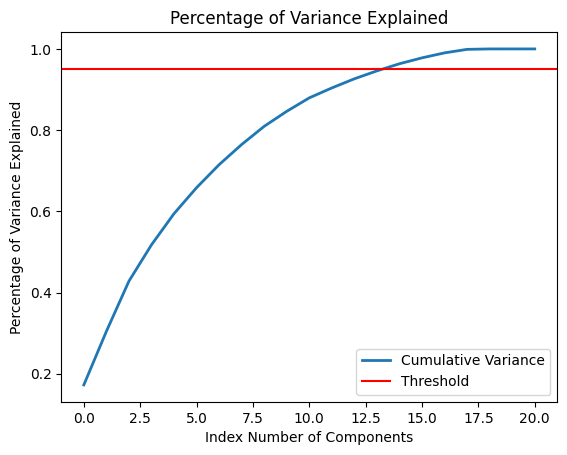

In [83]:
threshold = 0.95
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumulative_explained_variance, linewidth = 2)
plt.axhline(y = threshold, color = 'red')
plt.title('Percentage of Variance Explained')
plt.xlabel("Index Number of Components")
plt.ylabel("Percentage of Variance Explained")
plt.legend(['Cumulative Variance','Threshold'])

In [84]:
X_train_student_final_premodel_version = X_train_scaled
X_test_student_final_premodel_version = X_test_scaled

y_train_student_final_premodel_version = y_train
y_test_student_final_premodel_version = y_test

### Step 9: Linear Regression Modelling <a class="anchor" id = "s9"></a>

Linear regression is defined as a machine learning model in which the model finds the best fit linear line between the independent and dependent variables in which the aim is to find the best fit linear line and the optimal values of intercept and coefficients such that errors are minimized. For the purpose of this analysis, the goal is to use the X variables e.g. columns other than item outlet sales,to predict the item outlet sales (y variable, or target variable).
### Building and Evaluating the Model
In order to evaluate the model performance of a linear regression model, a range of measures can be used, but in this ASG1 we will focus on only 2:

- Mean Square Error (MSE): The MSE is the variance of the residuals, that is, the squared differences between prediction and actual observation. Lower values of MSE indicate better fit and model performance.
- R-Square: R-square represents the percentage of the response variable variation that is explained by a linear model. The closer to 1.0 the value of R-square, the more indicative of a better fit and model performance.

In [85]:
# assign your fully cleaned and transformed data contained within your versions of 
# X_train_student_final_premodel_version, X_test_student_final_premodel_version,
# y_train_student_final_premodel_version and y_test_student_final_premodel_version into
# the prepared variables below, for a simple linear regression model

In [86]:
X_train_final = X_train_student_final_premodel_version
X_test_final = X_test_student_final_premodel_version

y_train_final = y_train_student_final_premodel_version
y_test_final = y_test_student_final_premodel_version

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [88]:
# Build Linear Regression Model
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_final, y_train_final)

# Evaluate the Linear Regression Model using Mean Square Error (MSE)
# The lower MSE, the better the model performance
print('train_mse:', mean_squared_error(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\n test_mse:', mean_squared_error(y_test_final, model_linear_regression.predict(X_test_final)))

# Evaluate the Linear Regression Model using R-Square
# The closer the r-square value to 1, the better the model performance
print('train_r-sq:', r2_score(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\n test_r-sq:', r2_score(y_test_final, model_linear_regression.predict(X_test_final)))

train_mse: 103.27357375113604 
 test_mse: 110.59420214512315
train_r-sq: 0.40186125885492674 
 test_r-sq: 0.3847211495567384


 ----------------------------------------------------------------------------------

# Report 

# Content page
[Intro](#intro)

[Exploratory Data Analysis](#eda)

[Data Cleaning](#clean)

[Data Transformation](#transform)

[Feature Engineer](#fe)

[Linear Regression Model](#lrm)

[Summary and Further Improvements](#sum)

# Intro <a class="anchor" id = "intro"></a>

The purpose of this report is to help XYZ Music Records Company to improve their business in the future by analyzing data that has been collected. This is so that I am able to understand the influence of various song characteristics on a song's popularity. Through analyzing the data, I and my team have been able to come up with insights that enable me to predict a song's popularity based on its various attributes such as 'Loudness', 'Tempo', and other attributes. With this, I have come up with recommendations on how to optimize the company's allocation of marketing resources, so that more resources can be placed towards more popular songs, and placing less importance on less popular songs, so that resources are not wasted.

# Exploratory Data Analysis <a id = "viz"></a>

By conducting exploratory data analysis, I have come up with multiple insights and have been able to identify the trends in the numerical categories. First, I found the descriptions of the data, referring to the mean, standard deviation, median, and other calculations. This data would be helpful in identifying trends in the data. It can also help to give me a general idea of how the data is being distributed. I created a heatmap that was used to help me identify the correlations between the different variables in the dataset, whether there was a positive or negative correlation. A positive correlation would be referring to the when the value of one variable increases the value of the other variable would increase as well, and for negative correlations as the value of 1 variable increases the other would decrease. As for correlations nearing 0, there would be no linear relationship. Then, I obtained the information about each column in the dataset. By doing this, I was able to identify the data types of the data within each individual column, and the number of rows in the dataset. This resulted in me being able to identify a column which was set with the wrong data type. The column 'Liveness' was assigned the 'object' data type when it should have been a 'float' data type. This is because the 'Liveness' column contained float values and the null values were replaced by '?'s, which caused the data type to be object instead of float. Due to this error, I was previously unable to plot a boxplot for the 'Liveness' column. The information about the dataset also showed me which of the columns had null values, which I would have to clean later on. These columns were 'Danceability', 'Speechiness', 'Dynamism', 'Liveness', and 'Loudness'. Although the column 'Loudness' and 'Liveness' contained null values, they were represented by '?'s instead. This resulted in the null values not being displayed, which would cause problems later on when trying to form relations between the variables. As a result, I replaced the '?' with null values in my data cleaning, so that I was able to change the data type of the 'Liveness' column, and handle the null values in the columns with null values together. Following this, I calculated the percentage of null values within each column. This helped me to see which columns contained null values, which I would have to clean later on during data preprocessing by doing null value imputation. I then checked the number of unique variables within each column and plotted the results on a bar graph. This helped me to identify columns with the largest number of unique values. I checked the distribution of the values within each numerical column by plotting histograms for each column, followed by box plots. By using these 2 plots, I was able to identify the general distribution of values, the most frequent value ranges, the range of the data, the outliers, and more information, which can also be helpful when I am trying to identify trends when trying to generate insights. The columns 'Decibel', 'Speechiness', and 'Instrumentalness' were some columns with a very high number of outliers, as can be seen by the boxplots that were created having a large number of circles that are outside of the boxplots. This data could be used for me to come up with insights and it also helps me to decide what to do in the next step. For example, in the numerical column 'Danceability', there were outliers observed, which were necessary to be removed, through either capping or trimming. This would help to improve the accuracy of the data models that I create, as outliers can introduce biasness to them, skewing the graphs and causing my train test data and graphs to be inaccurate. 

# Data Cleaning <a id = "clean"></a>

After completing the exploratory data analysis, I moved on to cleaning the data. First, I replaced the '?' in the columns to null values so that I could handle the null values all together at the same time, since leaving the values as '?' would have caused the data to be less accurate or skewed. I then changed the data type of the column with the incorrect data type assigned that I identified during the exploratory data analysis, changing it from object to float, such that I was able to conduct calculations using the data in the column and plot graphs. I dropped the column 'Code' as well as the column 'Song_Name' as they are unneccessary columns that do not help with my investigations, as I was finding the relationships between the variables and song popularity. In one of the columns, 'Dynamism', there were multiple instances where the category name was inputted incorrectly, resulting in there being a large number of categories that refer to the same range of values, which was not necessary, and was instead making the data more complex and difficult to understand. To fix this, I replaced them with the correct category names, such that there are fewer category names, but they are all referring to unique ranges of values. Previously, there were the categories 'Hi', 'h', 'high', 'l', 'Lo', 'm', 'Med', 'High', 'Low', 'Medium', 'Extra'. After correcting the categories, I was left with 'High', 'Medium', 'Low', and 'Extra'. From the data exploratory phase, I discoverede that there were null values in some of the categorical columns, 'Dynamism' and 'Loudness', and since they had a relationship with a numerical column, I was able to deduce the missing values. Each category within the categorical columns was referring to a certain range within the numerical column, 'Decibel'. By calculating the ranges of which the categories are referring to, I was able to replace the null values in the categorical columns with their respective values. I did this by grouping the categorical column with the numerical column and finding the maximum value of each range, which I then used to create thresholds that I could then use to identify which of the categories that I should be replacing each null value with. Following this, I looped through the data frame, and any null values encountered would be replaced with their respective values. After replacing the null values, I once again calculated the percentage of null values within the columns, to ensure that the null values were replaced, and that there were no more null values. I was able to obtain a percentage of 0 null values. I then split the data into train and test sets. After splitting the data into training and testing sets, I then removed the null values from the numerical columns, 'Liveness', 'Danceability', and 'Speechiness'. I chose to use Mean Median Imputation to handle the null values. As I chose to use the median values, the null values were replaced with the median values of the numerical columns that they were in. The reason why I chose to replace the null values with the median values is that the train test sets still contained outliers, which skewed the data. However, the median value is less affected by outliers as compared to the mean, which would help to prevent the values inputted from being too inaccurate. After replacing the values I checked the percentage of null values once again to ensure that the null values had been removed.

# Data Transformation <a id = "transform"></a>

During the data transformation phase, I created a function that I used to plot the distributions of the numerical variables and to see whether the data follows a normal distribution. The function created used the data to plot a histogram and a line graph. Using the function to plot a  column with normally distributed data would create a histogram with higher values at its middle and lower at the edges, along with a line graph that is increasing linearly. After plotting these graphs, I then transformed the categorical columns by using the YeoJohnsonTransformer. I used this transformer so that I could transform the skewed data into a more normally distributed form. After transforming the data, I once again plotted the distributions of the numerical variables so that I was able to make a comparison and see whether the data had become more normally distributed. The histograms and line graphs plotted indicated that the data had become more normally distributed, as the histograms had more data at the middle points as compared to at the edges of the graph, and the line graph had changed such that it was more linear, as compared to how it was before using the YeoJohnsonTransformer. Following this, I handled the outliers in the data by using the Winsorization feature engine to cap the data. The maximum value that the values were capped at was 3 standard deviations away from the mean, and it capped both the upper and lower parts of the data. Any values higher than this threshold of 3 standard deviations away from the mean was replaced with the maximum value calculated, and the same thing was done for the minimum value, where any values that were lower than the threshold calculated would be replaced with the minimum value. I chose to cap the data instead of trimming it as some of the numerical columns contained a large number of outliers, and removing these values from the dataset may have skewed the data, and caused it to be less accurate. As I was aiming to preserve the accuracy of the data model, I chose to cap the data instead of trimming it. After handling the outliers, I then encoded the data. I encoded the categorical columns by using ordinal encoding, one hot encoding and grouping by rare categories. This is because ordinal encoding is suited to encoding categories that have a certain order, which the categorical columns had, as they contained categories that described differing ranges of decibels in the numerical column 'Decibel'. One hot encoding was also used as it was suitable for the data that did not have a particular hierarchy or order. Since the categorical column 'Loudness' contained a large number of categories, I chose to group it by rare categories before using one hot encoding on it, as after grouping by rare categories, the data would not have an order, thus being less suited for ordinal encoding, and more suited for one hot encoding. Grouping by rare categories involves identifying the categories within the categorical column that occur infrequently and groups them into a single category, so as to reduce the number of categories and simplify the dataset. I encoded the categorical column 'Dynamism' with ordinal encoding, and the column 'Loudness' with grouping by rare categories, since 'Loudness' contained a large number of categories and so was suitable for grouping by rare categories, so that there would be fewer variables which would then make the data simpler and easier to understand. For the column 'Loudness' that was grouped by rare categories, I then performed one hot encoding on it. This creates new binary columns for each category that was previously inside the 'Loudness' categorical column. The columns would all contain either a 0 or a 1, which would be used to identify the category of 'Loudness'. For the column 'Dynamism', as there was an order to the variables, I chose to use ordinal encoding, since it was the most suitable encoding method as compared to the other encoding methods, for these columns. This replaced the values in the columns with their respective ranks, numbering from 1 onwards. After encoding the data, I proceeded to perform variable discretization. I used the EqualWidthDiscretiser to transform the numerical columns into discrete bins with equal widths. I then created a comparison bar chart so that I could compare the distributions of the values in the train set and in the test set. The graphs were able to follow similar distributions, which suggests that the data is consistent.

# Feature Engineer <a id = "fe"></a>

For the feature engineering, I chose to use the MinMaxScaler to scale the data in the train test sets. This is because it is able to scale the data to a range between 0 and 1, and normalize the data, which helps to ensure uniformity across the variables. Scaling the data to the same scale is important as it is able to help to enhance the Linear Regression model performance, which I would be doing later on. After scaling the data, I plotted 2 subplots for each variable that was scaled to observe the effect that was produced from scaling the data with the MinMaxScaler. The first subplot shows the state of the data before scaling it, while the second subplot shows the state of the data after scaling it. By doing this, I was able to easily compare the distributions of each variable before and after scaling, and it also helped me to ensure that the scaling was performed correctly, resulting in the variables now being on similar scales, which would improve the performance of the Linear Regression Model. After scaling the data, the variables became more aligned, and had more similar spreads, and all of the variables were now on the same scale, this resulted in there being a fair comparison and interpretation across variables. By scaling the data, with the variables on the same scale, it became easier to interpret them, and understand the importance of each variable. After scaling the data, I used PCA, Principal Component Analysis, on the train test datasets, so as to simplify the Linear Regression Model which would be created later on in the later step. The reason that I used PCA on the train test dataset was to reduce the number of columns within the dataset by removing any  of the unnecessary columns from the dataset. This results in the data being more simplistic and the Linear Regression Model being created faster. Although PCA removes some of the columns from the dataset, the dataset is still able to retain the distributions of the data. After using PCA on the train test dataset, I plotted a cumulative line graph that explains the percentage of variance for each principal component. The title of the graph was 'Percentage of Variance Explained', and it plots the cumulative explained variance against the number of principal components retained after applying PCA. The trend of the line in the graph plotted was increasing at a decreasing rate, where as the number of principal components increases, the amount of information obtained decreases. The red line plotted represents the target variance, which is set at 95%. The reason for this is to find the number of columns that are required to obtain 95% of the total information that can be obtained from the data. This helped me to determine the optimal number of principal components that are required to capture a significant portion of the data's variability, which would help to maintain the accuracy of the Linear Regression Model that would be created.

# Linear Regression Model <a id = "lrm"></a>

In the final step, I built the Linear Regression model. The Linear Regression Model helps to provide easily interpretable results. It can also be used to predict the value of the dependent variables in new observations based on their independent variables. This is useful when trying to predict future trends or outcomes by using the data in the train and test dataset. After creating the Linear Regression Model, I then evaluated it by using Mean Square Error and R-Square. The Mean Square Error helps to provide a measure of the accuracy of the Linear Regression Model. The lower the Mean Square Error, the better the model will perform, and it will also be more accurate. For the R-Square values, they help to provide a measure of the proportion of the variance in the dependent variable that is predictable from the independent variables, and the closer that they are to 1, the better that the model performance will be. I managed to obtain values of 103 for my train set Mean Square Error value, 110 for my test set Mean Square Error value, 0.401 for my train set R-Square value, and 0.384 for my test set R-Square value. With a smaller difference between the R-Square values of the train and test sets, the Linear Regression Model would then be able to have a better generalization performance. 

# Summary and Further Improvements <a id = "sum"></a>

In summary, this report contains an in-depth analysis of the song characteristics that are affecting popularity for songs in the XYZ Music Records Company. Through exploratory data analysis, data cleaning, transformation, and feature engineering, I managed to derive insights. The process involved identifying trends, handling outliers, encoding categorical data, and scaling features. I applied PCA, Principal Component Analysis, to simplify the dataset while retaining the distributions of the data. Finally, I built a Linear Regression Model and evaluated it using the Mean Square Error and R-Square values, which showed the accuracy of the model. By using the Linear Regression Model it would be possible to predict trends of the song popularity and use this information to further improve the company.